In [1]:
import re
import string
import numpy as np 
import random
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter

In [2]:
import nltk
from nltk.corpus import stopwords
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from tqdm import tqdm
import os
import nltk
import spacy
import random
from spacy.util import compounding
from spacy.util import minibatch
import os
import warnings
warnings.filterwarnings("ignore")

In [20]:
df_train = pd.read_csv('train.csv')


df_train['Num_words_text'] = df_train['text'].apply(lambda x:len(str(x).split()))
#Number Of words in main Text in train set
df_train = df_train[df_train['Num_words_text']>=3]

y = df_train['selected_text']
X = df_train[['textID', 'text', 'sentiment']]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [22]:
X_train

,textID,text,sentiment
23808,2b88988152,so how are you doing this morning ?,neutral
8807,6fbff71c0c,"Oh, wow, you`re fast How`s life going ? It`...",positive
26494,cf2f393f1f,Just went a bought the bigest redbull i could ...,negative
16573,04b00763ff,"that reminds me, i need to pick up a mask 2mr...",positive
2920,9a525beff0,play vanessa hudgens new songs plz or vfactory,neutral
...,...,...,...
7166,567eaf266e,Me too I need the sudden urge to do it. Missi...,negative
24491,f5ce905ac0,http://twitpic.com/4wij6 - my oldest nephew pl...,neutral
20343,0c5b15af47,never thought my daughter would want to borrow...,neutral
10897,94cf586a06,"simple recipe for creamy spaghetti with bacon,...",neutral


In [24]:
def jaccard(str1, str2): 
    a = set(str1.lower().split()) 
    b = set(str2.lower().split())
    c = a.intersection(b)
    return float(len(c)) / (len(a) + len(b) - len(c))

In [25]:
results_jaccard=[]

for ind,row in df_train.iterrows():
    sentence1 = row.text
    sentence2 = row.selected_text

    jaccard_score = jaccard(sentence1,sentence2)
    results_jaccard.append([sentence1,sentence2,jaccard_score])

In [27]:
jaccard = pd.DataFrame(results_jaccard,columns=["text","selected_text","jaccard_score"])
df_train = df_train.merge(jaccard,how='outer')
df_train['Num_words_ST'] = df_train['selected_text'].apply(lambda x:len(str(x).split())) #Number Of words in Selected Text
df_train['Num_word_text'] = df_train['text'].apply(lambda x:len(str(x).split())) #Number Of words in main text
df_train['difference_in_words'] = df_train['Num_word_text'] - df_train['Num_words_ST'] #Difference in Number of words text and Selected Text

In [28]:
df_train.head()

,textID,text,selected_text,sentiment,Num_words_text,jaccard_score,Num_words_ST,Num_word_text,difference_in_words
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,7,1.000000,7,7,0
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,10,0.200000,2,10,8
2,088c60f138,my boss is bullying me...,bullying me,negative,5,0.166667,2,5,3
3,9642c003ef,what interview! leave me alone,leave me alone,negative,5,0.600000,3,5,2
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,14,0.214286,3,14,11


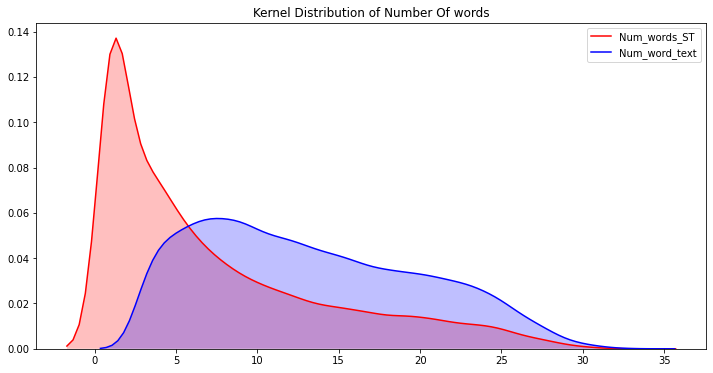

In [29]:
plt.figure(figsize=(12,6))
p1=sns.kdeplot(df_train['Num_words_ST'], shade=True, color="r").set_title('Kernel Distribution of Number Of words')
p1=sns.kdeplot(df_train['Num_word_text'], shade=True, color="b")

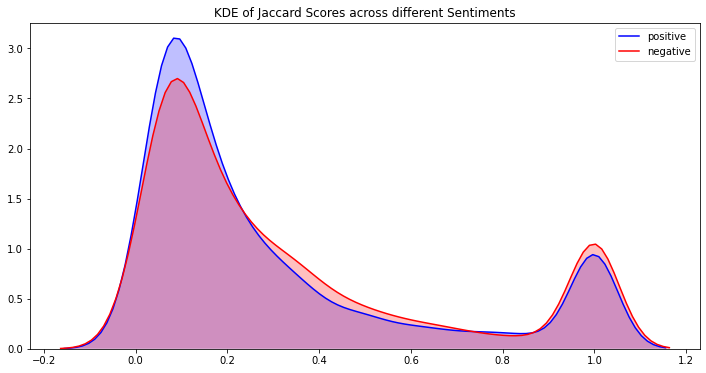

In [31]:
plt.figure(figsize=(12,6))
p1=sns.kdeplot(df_train[df_train['sentiment']=='positive']['jaccard_score'], shade=True, color="b").set_title('KDE of Jaccard Scores across different Sentiments')
p2=sns.kdeplot(df_train[df_train['sentiment']=='negative']['jaccard_score'], shade=True, color="r")
plt.legend(labels=['positive','negative'])

In [157]:
Positive_sent = X_train[X_train['sentiment']=='positive']
Negative_sent = X_train[X_train['sentiment']=='negative']
Neutral_sent = X_train[X_train['sentiment']=='neutral']

In [176]:
def plot_wordcloud(text, mask=None, max_words=200, max_font_size=100, figure_size=(24.0,16.0), color = 'white',
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'u', "im"}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color=color,
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    width=400, 
                    height=200,
                    mask = mask)
    wordcloud.generate(str(text))
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  
d = '/kaggle/input/masks-for-wordclouds/'

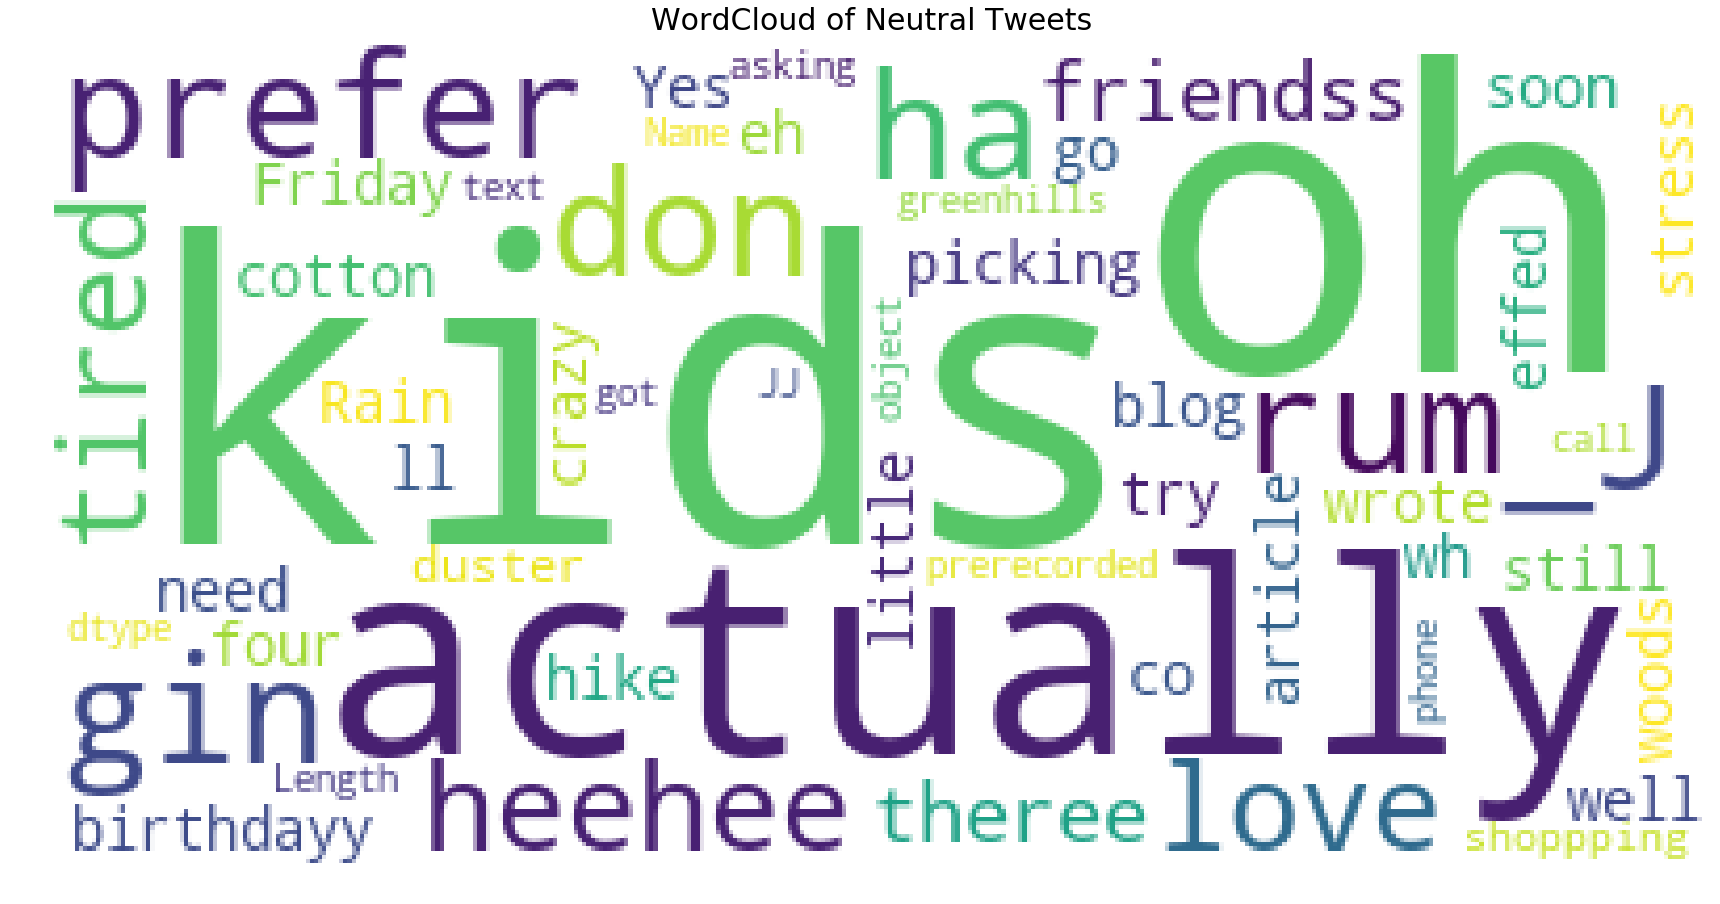

In [178]:
#pos_mask = np.array(Image.open(d+ 'twitter_mask.png'))
plot_wordcloud(Neutral_sent.text,color='white',max_font_size=100,title_size=30,title="WordCloud of Neutral Tweets")

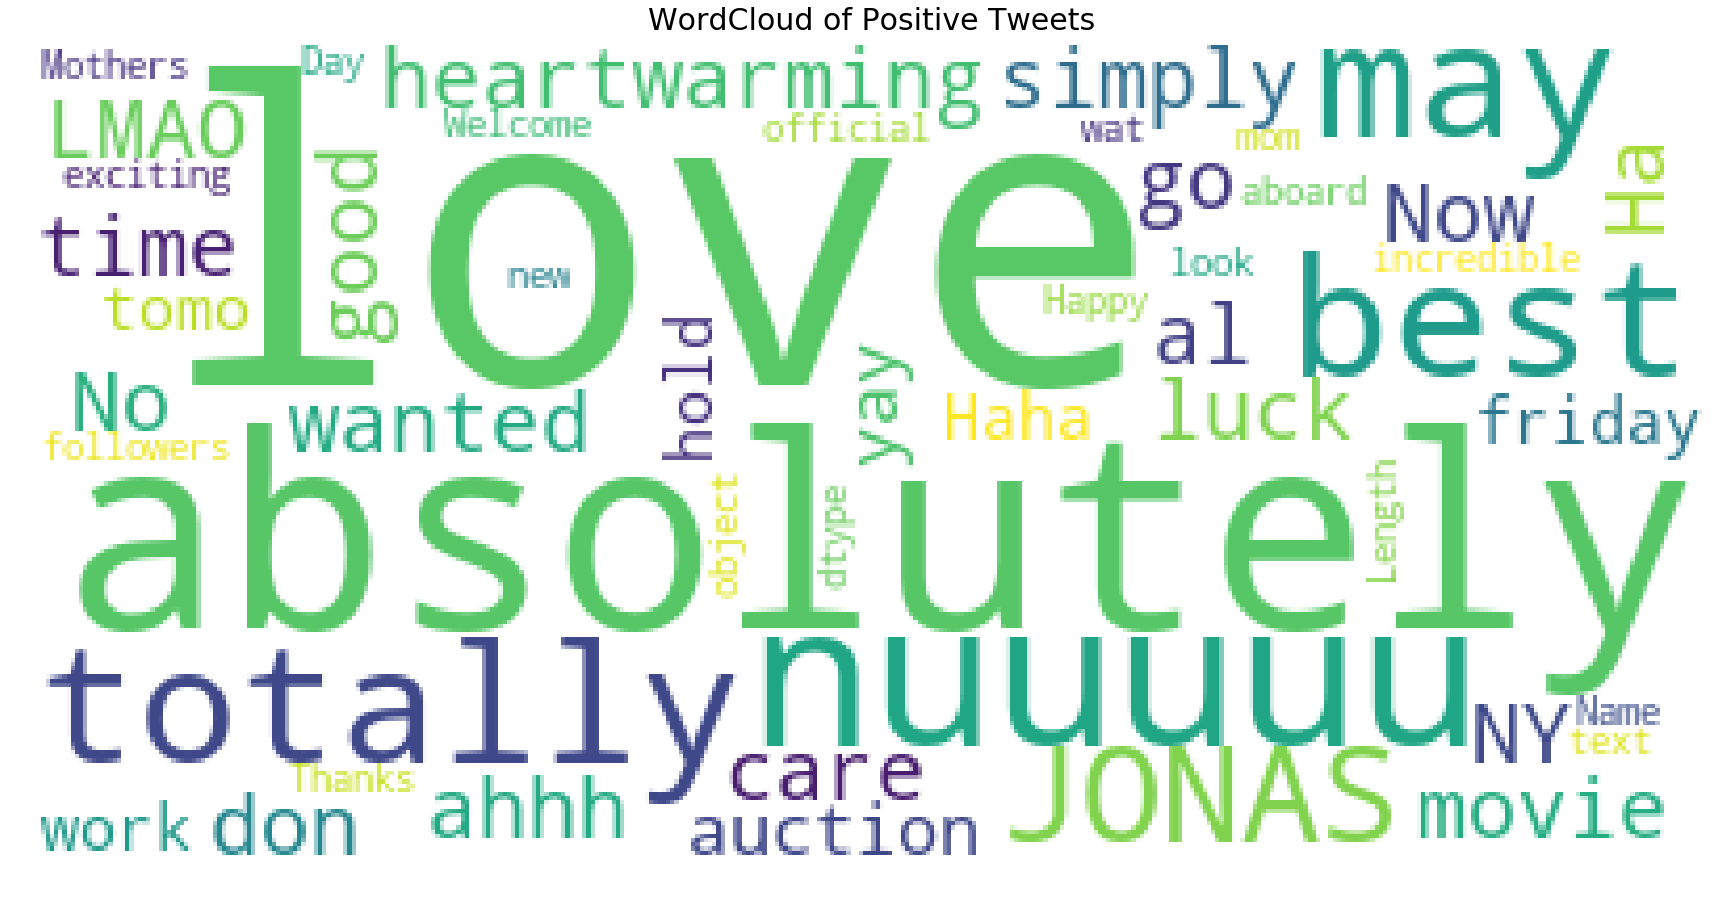

In [180]:
#pos_mask = np.array(Image.open(d+ 'twitter_mask.png'))
plot_wordcloud(Positive_sent.text,color='white',max_font_size=100,title_size=30,title="WordCloud of Positive Tweets")

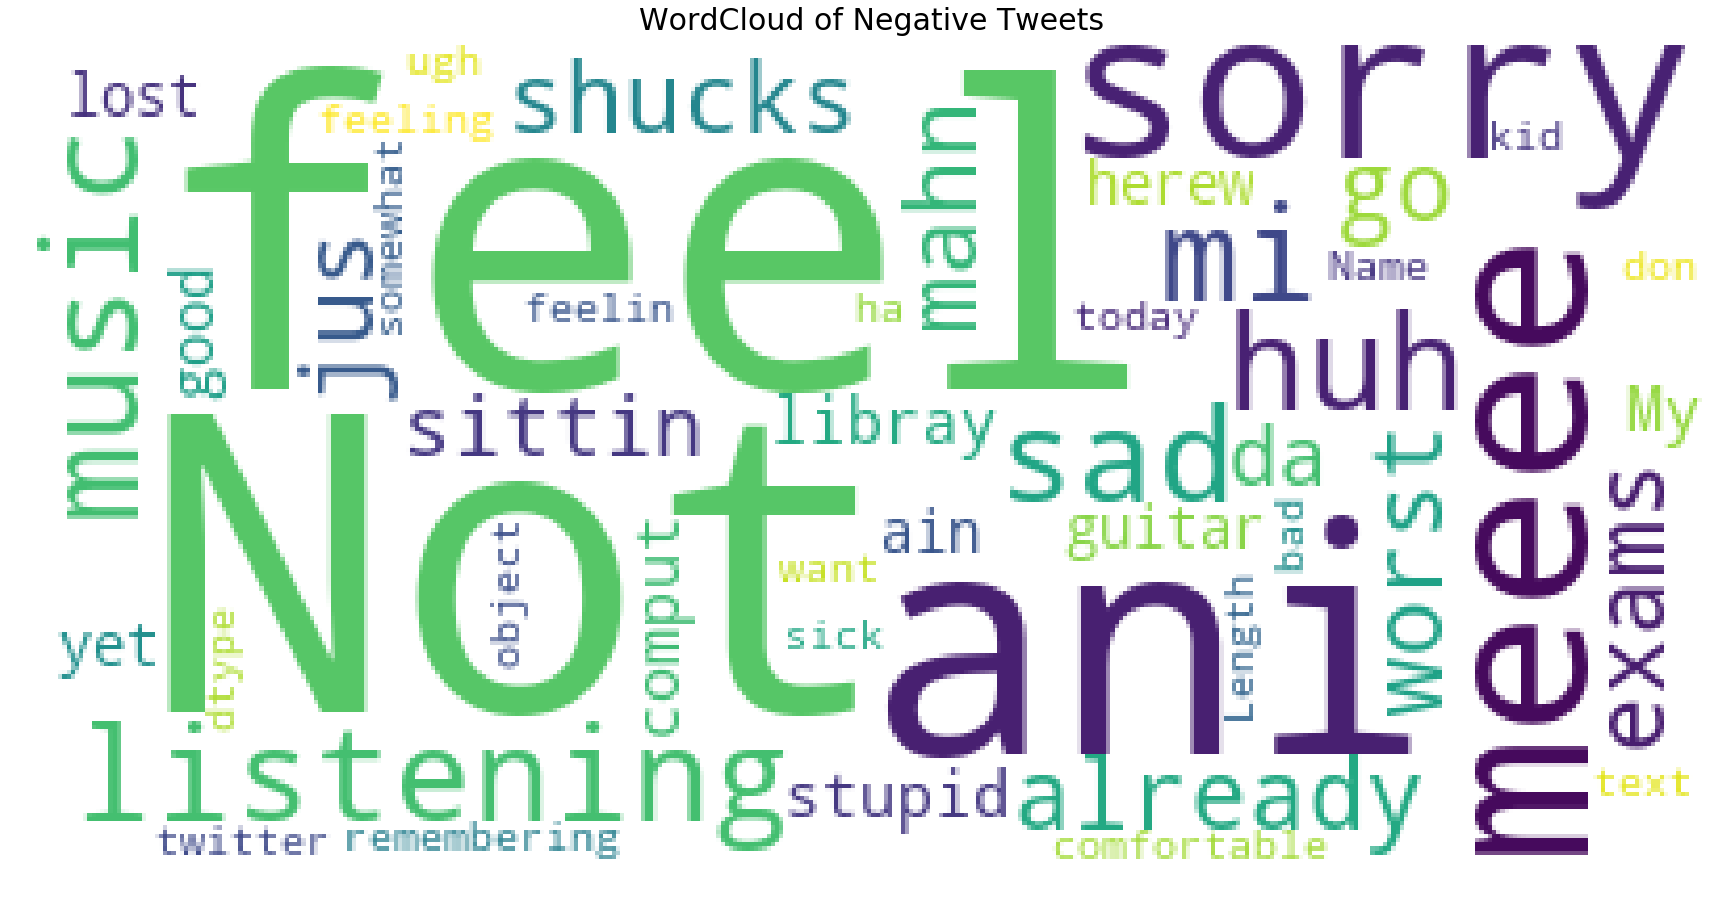

In [182]:
#pos_mask = np.array(Image.open(d+ 'twitter_mask.png'))
plot_wordcloud(Negative_sent.text,color='white',max_font_size=100,title_size=30,title="WordCloud of Negative Tweets")




In [174]:
text

0         actually I`d prefer a rum or gin but don`t ha...
3                       _J heehee. i love you! i am tired.
6                 off to friendss for theree birthdayy.  X
7        eh...but I`ll be picking cotton soon....need t...
8                        Rain  oh well it`s still Friday!!
                               ...                        
21381     Yes - it`s an article I wrote on my blog a wh...
21382     oh you crazy kids and your stress. try effed ...
21383     'A hike in the woods with four little kids co...
21386    is about to go duster shoppping in greenhills ...
21393    got a prerecorded phone call from JJ asking to...
Name: text, Length: 8581, dtype: object

In [97]:
def save_model(output_dir, nlp, new_model_name):
    ''' This Function Saves model to 
    given output directory'''
    
    output_dir = f'../working/{output_dir}'
    if output_dir is not None:        
        if not os.path.exists(output_dir):
            os.makedirs(output_dir)
        nlp.meta["name"] = new_model_name
        nlp.to_disk(output_dir)
        print("Saved model to", output_dir)

In [98]:
# pass model = nlp if you want to train on top of existing model 

def train(train_data, output_dir, n_iter=20, model=None):
    """Load the model, set up the pipeline and train the entity recognizer."""
    ""
    if model is not None:
        nlp = spacy.load(output_dir)  # load existing spaCy model
        print("Loaded model '%s'" % model)
    else:
        nlp = spacy.blank("en")  # create blank Language class
        print("Created blank 'en' model")
    
    # create the built-in pipeline components and add them to the pipeline
    # nlp.create_pipe works for built-ins that are registered with spaCy
    if "ner" not in nlp.pipe_names:
        ner = nlp.create_pipe("ner")
        nlp.add_pipe(ner, last=True)
    # otherwise, get it so we can add labels
    else:
        ner = nlp.get_pipe("ner")
    
    # add labels
    for _, annotations in train_data:
        for ent in annotations.get("entities"):
            ner.add_label(ent[2])

    # get names of other pipes to disable them during training
    other_pipes = [pipe for pipe in nlp.pipe_names if pipe != "ner"]
    with nlp.disable_pipes(*other_pipes):  # only train NER
        # sizes = compounding(1.0, 4.0, 1.001)
        # batch up the examples using spaCy's minibatch
        if model is None:
            nlp.begin_training()
        else:
            nlp.resume_training()


        for itn in tqdm(range(n_iter)):
            random.shuffle(train_data)
            batches = minibatch(train_data, size=compounding(4.0, 500.0, 1.001))    
            losses = {}
            for batch in batches:
                texts, annotations = zip(*batch)
                nlp.update(texts,  # batch of texts
                            annotations,  # batch of annotations
                            drop=0.5,   # dropout - make it harder to memorise data
                            losses=losses, 
                            )
            print("Losses", losses)
    save_model(output_dir, nlp, 'st_ner')

In [99]:
def get_model_out_path(sentiment):
    '''
    Returns Model output path
    '''
    model_out_path = None
    if sentiment == 'positive':
        model_out_path = 'models/model_pos'
    elif sentiment == 'negative':
        model_out_path = 'models/model_neg'
    return model_out_path

In [100]:
def get_training_data(sentiment):
    '''
    Returns Trainong data in the format needed to train spacy NER
    '''
    train_data = []
    for index, row in df_train.iterrows():
        if row.sentiment == sentiment:
            selected_text = row.selected_text
            text = row.text
            start = text.find(selected_text)
            end = start + len(selected_text)
            train_data.append((text, {"entities": [[start, end, 'selected_text']]}))
    return train_data

In [101]:
sentiment = 'positive'

train_data = get_training_data(sentiment)
model_path = get_model_out_path(sentiment)
# For DEmo Purposes I have taken 3 iterations you can train the model as you want
train(train_data, model_path, n_iter=3, model=None)

  0%|          | 0/3 [00:00<?, ?it/s]

Created blank 'en' model


 33%|███▎      | 1/3 [00:33<01:06, 33.23s/it]

Losses {'ner': 33833.77310369668}


 67%|██████▋   | 2/3 [01:02<00:32, 32.07s/it]

Losses {'ner': 30845.819419418905}


100%|██████████| 3/3 [01:32<00:00, 31.30s/it]

Losses {'ner': 29567.25231398294}
Saved model to ../working/models/model_pos


In [102]:
sentiment = 'negative'

train_data = get_training_data(sentiment)
model_path = get_model_out_path(sentiment)

train(train_data, model_path, n_iter=3, model=None)

  0%|          | 0/3 [00:00<?, ?it/s]

Created blank 'en' model


 33%|███▎      | 1/3 [00:29<00:59, 29.88s/it]

Losses {'ner': 31901.479765716824}


 67%|██████▋   | 2/3 [01:04<00:31, 31.41s/it]

Losses {'ner': 28833.85964764454}


100%|██████████| 3/3 [01:36<00:00, 31.35s/it]

Losses {'ner': 27126.614724292493}
Saved model to ../working/models/model_neg


In [153]:
def predict_entities(text, model):
    doc = model(text)
    #print(doc, "@@@@@@@@@@@@@@@@@@@@@next", doc.ents)
    ent_array = []
    count = 1
    for ent in doc.ents:
        #print(count)
        #count+=1
        start = text.find(ent.text)
        end = start + len(ent.text)
        new_int = [start, end, ent.label_]
        if new_int not in ent_array:
            ent_array.append([start, end, ent.label_])
    selected_text = text[ent_array[0][0]: ent_array[0][1]] if len(ent_array) > 0 else text
    #print(type(doc.ents[0]))
    #selected_text = doc.ents[0] if len(doc.ents)> 0 else text
    return selected_text

In [154]:
selected_texts = []
MODELS_BASE_PATH = '../working/models/'

if MODELS_BASE_PATH is not None:
    print("Loading Models  from ", MODELS_BASE_PATH)
    model_pos = spacy.load(MODELS_BASE_PATH + 'model_pos')
    model_neg = spacy.load(MODELS_BASE_PATH + 'model_neg')
        
    for index, row in X_train.iterrows():
        text = row.text
        output_str = ""
        if row.sentiment == 'neutral' or len(text.split()) <= 2:
            selected_texts.append(text)
        elif row.sentiment == 'positive':
            selected_texts.append(predict_entities(text, model_pos))
        else:
            selected_texts.append(predict_entities(text, model_neg))
        
X_train['selected_text_pred'] = selected_texts

Loading Models  from  ../working/models/
 nuuuuu, i totally love may, it`s the best for me cos i was born in may @@@@@@@@@@@@@@@@@@@@@next ()
JONAS was absolutely heartwarming. Now, time for bed. Goodnight!   @@@@@@@@@@@@@@@@@@@@@next (Goodnight!,)
  on your ani?  sorry @@@@@@@@@@@@@@@@@@@@@next (sorry,)
ahhh ... i don`t care, i love this movie in all it`s cheesy-ness @@@@@@@@@@@@@@@@@@@@@next (love,)
 LMAO...Ha! No I just simply wanted to go to NY! @@@@@@@@@@@@@@@@@@@@@next ()
 good luck with your auction @@@@@@@@@@@@@@@@@@@@@next (good luck with your auction,)
I`m way to sleepy.. Ill watch my shows lata..Good nite twit-fam!.. God bless!..XoXo @@@@@@@@@@@@@@@@@@@@@next (Good,)
That poor girl on britains got talent, god love her  forgot the words and cried  but gets a second chance to perform again : ] @@@@@@@@@@@@@@@@@@@@@next ()
 meeee too. i am listening to sad music and missing you.  ps - http://www.daytrotter.com/ @@@@@@@@@@@@@@@@@@@@@next (sad,)
 Buenos Dias! How very sweet, than

Ive got mad cramps in my legs @@@@@@@@@@@@@@@@@@@@@next ()
 woop rehearsing songs  Yep, sounds even enough to me @@@@@@@@@@@@@@@@@@@@@next ()
finished the book... vat a good book <3333 @@@@@@@@@@@@@@@@@@@@@next (good,)
Huge test at the parents` house. The food is so good, but stuck to one helping, no seconds. Feels good. @@@@@@@@@@@@@@@@@@@@@next (Feels good.,)
Got stuck in a traffic jam today, i now have one sunburned arm @@@@@@@@@@@@@@@@@@@@@next ()
Gotta get ready to leave....Alec and I are going hunting outside of Volterra. This should be fun.  Talk to everyone later. @@@@@@@@@@@@@@@@@@@@@next (fun.,)
Wants somebody to cheer her up @@@@@@@@@@@@@@@@@@@@@next ()
 I loves me some Jeff Lynne, and I do enjoy sitar work, but that was kinda weird. To each his own, I s`pose! @@@@@@@@@@@@@@@@@@@@@next (I loves me some Jeff Lynne, and I do enjoy sitar work, but that was kinda weird. To each his own, I s`pose!,)
_peter let`s smoke and watched dazed and confused. that`s a perfect pizza movie t

_sounds bicycle? Sucks i cant ride with you @@@@@@@@@@@@@@@@@@@@@next (Sucks,)
 cheer up buttercup! Rain will go away and hearts always mend. I can actually bet $ on that! @@@@@@@@@@@@@@@@@@@@@next (cheer,)
 Thanks, it`s just too good for TV, simple as that.  #dollhouse @@@@@@@@@@@@@@@@@@@@@next (Thanks,,)
Two dozen roses sent  overnight and delivered this morning. Just found out the recipient is out of town!! Sad @@@@@@@@@@@@@@@@@@@@@next (delivered,)
 i want to comment but don`t understand what you`re saying @@@@@@@@@@@@@@@@@@@@@next ()
This chair is not comfortable at all @@@@@@@@@@@@@@@@@@@@@next ()
Oh PW, you done me wrong. The signing time in ur children`s article are all wrong...and no Neil Gaiman?! You tease me.  #bea @@@@@@@@@@@@@@@@@@@@@next ()
**** being drunk and hot sucks @@@@@@@@@@@@@@@@@@@@@next (**** being drunk and hot sucks,)
YAHOO! volleyball, hiking, eating a fish eye, witnessing, sleeping on the beach, jumping rocks, & hanging where Jurassic Park was filmed! @@@@@@

Download movie  '81st Annual Academy Awards Pre-Show' http://tinyurl.com/cdue53 cool #movie @@@@@@@@@@@@@@@@@@@@@next (cool,)
gonna have a lazy day today @@@@@@@@@@@@@@@@@@@@@next (lazy,)
rblpnBro  Not quite where I need to be here ... sad but true. Soon however all will be WELL  6wks ? http://blip.fm/~5z4ve @@@@@@@@@@@@@@@@@@@@@next (Not quite,)
Hey #socialmediatv ugh no way to do video>blah {pouts}   (Social Media TV live > http://ustre.am/2NjV) @@@@@@@@@@@@@@@@@@@@@next ()
 Oh no, that doesn`t sound good! better get it checked out. @@@@@@@@@@@@@@@@@@@@@next ()
 Omg same here! They hurt so much @@@@@@@@@@@@@@@@@@@@@next ()
 AWWWE! I live in Van, would`ve been so great to see you  but have a great flight! @@@@@@@@@@@@@@@@@@@@@next (great,)
had my first day at work and im not excited about the lay out of the place and where everything is.. o well its a job @@@@@@@@@@@@@@@@@@@@@next ()
 sadly  isn`t me. It`s some1 w/ 1 follower 1 update & hasn`t used Twitter since May 1, `07  I wanted t

 answer my really cool questions @@@@@@@@@@@@@@@@@@@@@next ()
 um, I think what I will miss the most is.. JAY LENO!!!!!!!! @@@@@@@@@@@@@@@@@@@@@next (miss,)
Out for an evening on the town with jeremy. Sad Carrie can`t come @@@@@@@@@@@@@@@@@@@@@next (Sad,)
 Patience, it`s worth it @@@@@@@@@@@@@@@@@@@@@next ()
wow this morning 8.15 hrs ding dong breakfastservice, was a surprise of Marjoleine, Guido and Dirk for mothersday.Mother hapy, father too @@@@@@@@@@@@@@@@@@@@@next ()
Unanticipated thunderstorm quashed camping trip @@@@@@@@@@@@@@@@@@@@@next (Unanticipated,)
 Had one of the female servers tell her **** looks big in those pants. She will worry all night long Lol @@@@@@@@@@@@@@@@@@@@@next ()
 I was in there earlier I`m not at home  I`m ok my iPod! @@@@@@@@@@@@@@@@@@@@@next ()
 WOOHOO!!!!! nothing says a hot date night than a squeegee! LOL i`m watching Dora on noggin with my 2yr girl, hubs is at work @@@@@@@@@@@@@@@@@@@@@next (WOOHOO!!!!! nothing says a hot date night than a squeegee!,

Wonders why its so hard for me to concentrate... @@@@@@@@@@@@@@@@@@@@@next (hard,)
me knows what to be tested on all the exam subjects except for english. **** davis. @@@@@@@@@@@@@@@@@@@@@next ()
They changed the way Golden Gaytimes are made. They used to be awesome. @@@@@@@@@@@@@@@@@@@@@next (awesome.,)
My whole immediate will be in the same city until some point tomorrow afternoon. This is monumental @@@@@@@@@@@@@@@@@@@@@next ()
Britain`s got (good) Weather. I wish I had some of that over here. @@@@@@@@@@@@@@@@@@@@@next ()
 why have you still not called me back regarding the groundbreaking production i sent you earlier @@@@@@@@@@@@@@@@@@@@@next ()
*sigh* my  USB died on my this afternoon. R.I.P, you will be missed! I hadn`t even had the chance to parade you around yet @@@@@@@@@@@@@@@@@@@@@next (missed!,)
great photoshoot today with Chris Ryan of Rolling Stone, Keegan Smith & the Fam may be opening for DAVE MATTHEW`s BAND THIS SUMMER!  EEK! @@@@@@@@@@@@@@@@@@@@@next (great,)
 Jz local

Goin 2 eat some SMACKS 4 breakfast then getting started on my day- catch ya on the flipside- I really wish I cud go mobile-dang Bahrain @@@@@@@@@@@@@@@@@@@@@next ()
 At least you`re getting closer to normal bedtime. Enjoy your trip. Keep us updated. Sweet dreams @@@@@@@@@@@@@@@@@@@@@next (Enjoy,)
'It`s not **** if you scream surprise first.' - my customer just said to me. Haha.  (via )LMAO @@@@@@@@@@@@@@@@@@@@@next ()
  thanx mang!  shes due in june 12th and yezzzir the first baby! -drummer boi @@@@@@@@@@@@@@@@@@@@@next (thanx,)
 How much longer is the NKOTB Block Party? Love it! I need to go to bed so just wondering what time it`s over..LOL..thanks! @@@@@@@@@@@@@@@@@@@@@next (Love,)
  you have been busy, have a lovely time @@@@@@@@@@@@@@@@@@@@@next ()
 aha thanks Jae @@@@@@@@@@@@@@@@@@@@@next ()
made it into leadership, buttt i`m still not happy! how can i enjoy it without my best friend? @@@@@@@@@@@@@@@@@@@@@next ()
 haha that photo is too funny! I hope he wasn`t disturbed by passeng

 Sure, its easier to login every day and make posts as an admin or mod, but ill try @@@@@@@@@@@@@@@@@@@@@next ()
 I like it too  I hadn`t seen the clip before, though; pretty cool! @@@@@@@@@@@@@@@@@@@@@next ()
I`m grounded til tomorrow. Sorry to anyone I made plans with.  It`ll have to be tomorrow. (annoyed) http://plurk.com/p/x332r @@@@@@@@@@@@@@@@@@@@@next (Sorry,)
 i think you should come tomarrow....because i was really really really looking foreword to seeing you.......please come? @@@@@@@@@@@@@@@@@@@@@next ()
 not this part, unfortunately. @@@@@@@@@@@@@@@@@@@@@next (unfortunately.,)
 I`m out of town next week   We`ll have to party when I get back. Happy early Birthday! @@@@@@@@@@@@@@@@@@@@@next (Happy,)
 Unfortunately I didn`t see any of that spreading of poo @@@@@@@@@@@@@@@@@@@@@next (Unfortunately,)
 aww. I hope you feel better soon. @@@@@@@@@@@@@@@@@@@@@next ()
About to pik out my hair, braid it up, scrub off my make up and relaxxxx.... tonight was fun @@@@@@@@@@@@@@@@@@@@@nex

 sorry but I`m not impressed in the slightest b/c u don`t eat ****..more like saddened and confused @@@@@@@@@@@@@@@@@@@@@next (sorry,)
 yeah that`s trueee  i can`t wait till the tour dvd comes out, that tour was so epic (: and the backstage material is hilarious @@@@@@@@@@@@@@@@@@@@@next ()
 heyahh i thought u wern`t cumin to london till the 5th ? i love you taylorr ..**** @@@@@@@@@@@@@@@@@@@@@next ()
Just five more days. Five more long days. Ahh! @@@@@@@@@@@@@@@@@@@@@next ()
I wish I was going to see      today!! I`m sad I dont @@@@@@@@@@@@@@@@@@@@@next (sad,)
 is that like Planes, Trains, and Automobiles?  Best of luck Juan Pelota. @@@@@@@@@@@@@@@@@@@@@next (Best,)
 aww homesick  i feel you! im homesick for my 2nd home, campp @@@@@@@@@@@@@@@@@@@@@next (homesick,)
 i think i`ll be home more than i want to be next week - no work booked in for the forseeable. @@@@@@@@@@@@@@@@@@@@@next ()
 Ready and waiting Donnie   We love you too @@@@@@@@@@@@@@@@@@@@@next ()
I need to relocate to the w

is hungryyyyyyy!! going to eat traditional indian food...the pakistani way. woowoo!  hahaha! >[_()\/3 @@@@@@@@@@@@@@@@@@@@@next ()
Officially Mother Day here HAPPY Mother Day to all the MOMS @@@@@@@@@@@@@@@@@@@@@next (HAPPY,)
Happy Mothers Day to all the mom`s around  Hope you have a wonderful day! @@@@@@@@@@@@@@@@@@@@@next (Happy,)
 I need one too. @@@@@@@@@@@@@@@@@@@@@next ()
Thinking I`m super excited about this week! @@@@@@@@@@@@@@@@@@@@@next ()
_x little Taylor? i feel sorry for the way she spells her name @@@@@@@@@@@@@@@@@@@@@next (sorry,)
Chillin at a bbq gettin my drink on @@@@@@@@@@@@@@@@@@@@@next (Chillin,)
 omfg I have been DOWNING them they are so tasty. I ate almost all of them with Lo @@@@@@@@@@@@@@@@@@@@@next ()
finally got to see you @@@@@@@@@@@@@@@@@@@@@next ()
Then me disliking you is a rumor!  cyndi! What made it look like i didn`t like you? @@@@@@@@@@@@@@@@@@@@@next ()
 wooooo the tour has started yay, 13 days  have an awesome time! loved the video xD @@@@@@@@@@@@@@

 yea it is.  thanks for the link. @@@@@@@@@@@@@@@@@@@@@next (thanks,)
Ha ha ha  I know! Love it! Love him! @@@@@@@@@@@@@@@@@@@@@next (Love,)
 wasnt it sad?  was the 3d good? @@@@@@@@@@@@@@@@@@@@@next ()
 Thanks!!!!  Happy Mother`s day to you too!! @@@@@@@@@@@@@@@@@@@@@next (Thanks!!!!  Happy Mother`s day to you too!!,)
 yeah it made a great noise, and tripped the house circuit breaker. Good Times. $200 worth of parts too @@@@@@@@@@@@@@@@@@@@@next ()
 Also, HAPPY STAR WARS DAY!!! @@@@@@@@@@@@@@@@@@@@@next (HAPPY,)
Something is totally eating up my broc, cab and beans   Insecticidal soap just isn`t getting rid of the pests but I don`t want chemicals @@@@@@@@@@@@@@@@@@@@@next ()
JONAS rocked tonight!  going to bed after I write a lil bit... Night and bless all @@@@@@@@@@@@@@@@@@@@@next ()
 nah is next week honey ma fault for confusin u @@@@@@@@@@@@@@@@@@@@@next (fault,)
New job today, wish me luck peeps @@@@@@@@@@@@@@@@@@@@@next ()
I am so bored @@@@@@@@@@@@@@@@@@@@@next (bored,)
About to

http://twitpic.com/4jkea -  now has 10,000 followers! Congrats! @@@@@@@@@@@@@@@@@@@@@next (Congrats!,)
Ever been to a restaurant with over 200 items on the menu?  Lunch decision shouldn`t be this hard @@@@@@@@@@@@@@@@@@@@@next (hard,)
Sometimes the things you say hurt the ones you love most unintentionally.  And you can never ever take it back or fix it. @@@@@@@@@@@@@@@@@@@@@next (hurt,)
 good luck!! How exciting @@@@@@@@@@@@@@@@@@@@@next (good luck!! How exciting,)
Market whn goes lower also problem and when it goes like a wild bull also problem @@@@@@@@@@@@@@@@@@@@@next (problem,)
 Ashlie, thank you.  You made me feel a little better. @@@@@@@@@@@@@@@@@@@@@next ()
at hannah montana set.... im missing tennessee ALOT today @@@@@@@@@@@@@@@@@@@@@next (missing,)
Still in same queue barely 1 metre from where i last twittered. This is insane. And i paid for this @@@@@@@@@@@@@@@@@@@@@next ()
 cause my eyelids are not deep set.  thanks it would help me a lot. @@@@@@@@@@@@@@@@@@@@@next (thanks,

I feel really bad for female racoons with abusive racoon husbands... when you always have black eyes- no one can help @@@@@@@@@@@@@@@@@@@@@next (bad,)
_caruso So I took the polish off of the nail of the finger the door handle murdered earlier, and well... it`s not pretty.... @@@@@@@@@@@@@@@@@@@@@next (murdered,)
 no im not  cries LOL @@@@@@@@@@@@@@@@@@@@@next ()
Yay for having a giant headache  stupid glasses. @@@@@@@@@@@@@@@@@@@@@next (headache,)
 demi, just say hi to me and it`s enough. just replay to me please  love you so much!!! @@@@@@@@@@@@@@@@@@@@@next (love,)
good morning  tis a rainy Monday morning...blahhh! @@@@@@@@@@@@@@@@@@@@@next (good,)
_distel Maybe u have natural ability for languages  I envy u on that !! @@@@@@@@@@@@@@@@@@@@@next (languages,)
twit twit twitter! trying to 'legally' watch a movie online, its not happening @@@@@@@@@@@@@@@@@@@@@next ()
Happy moms day @@@@@@@@@@@@@@@@@@@@@next (Happy,)
 haha, def. That song is EPIC, have fun  i`m listening to new FNB @@@@@@

wants to go out tonight but cant get home @@@@@@@@@@@@@@@@@@@@@next ()
 Sounds like fun  LoL. At least you still have some hair right?  how was the weekend? @@@@@@@@@@@@@@@@@@@@@next (Sounds like fun  ,)
  heheheheh... lol... I always figured he`d send them your way if he got any dupes... I felt bad not sending him stuff... @@@@@@@@@@@@@@@@@@@@@next (bad,)
everybody is awake (well not everybody, u know what i mean. ma friends) haha, and I`m having fun AIMing them @@@@@@@@@@@@@@@@@@@@@next ()
_Blue - the chauffeur from 'Some Kind of Wonderful' was my idea of a perfect woman @@@@@@@@@@@@@@@@@@@@@next ()
 Thanks for the tip on otherinbox...  It won`t work with outlook for me... @@@@@@@@@@@@@@@@@@@@@next (Thanks,)
Romantic evening in with papa murphys and 'battle BC' from the history channel @@@@@@@@@@@@@@@@@@@@@next ()
 those splinters look very painful...but you were being very heroic saving mr. Pickle @@@@@@@@@@@@@@@@@@@@@next ()
love the sweet g`nights every night @@@@@@@@@@@@@@@@@@@@@

thx for the tip.  how did you figure that one out? @@@@@@@@@@@@@@@@@@@@@next (thx,)
i just looove my bf  u are awesoome!!!! [hannah montana the movie was amazing  best movie ever!!]  // cool http://gykd.net @@@@@@@@@@@@@@@@@@@@@next (amazing,)
 It`s Star Wars day?! Urgh I`m gonna have to get the videos out @@@@@@@@@@@@@@@@@@@@@next ()
 you`re so lucky. we have 6 weeks until summer @@@@@@@@@@@@@@@@@@@@@next (you`re so lucky.,)
 yip, that would be a sign that you`ve been on the dodgy sites Jo... eish boet, it ain`t cool @@@@@@@@@@@@@@@@@@@@@next ()
Want to get my hands dirty with FubuMVC. http://bit.ly/J00ha, but the document is not yet complete @@@@@@@@@@@@@@@@@@@@@next ()
 Chowder is the ****!!!!!! @@@@@@@@@@@@@@@@@@@@@next ()
 Hugs to hubby! I`ll probably be in the same place come the 1st of September. @@@@@@@@@@@@@@@@@@@@@next (Hugs,)
_654  it`s this damp weather... @@@@@@@@@@@@@@@@@@@@@next ()
English exam! Bleh i hate vocab @@@@@@@@@@@@@@@@@@@@@next (hate,)
I just love it when  hot

 Having an awesome day? You should... I expect as much out of you  #awesomeupdater @@@@@@@@@@@@@@@@@@@@@next (Having an awesome day?,)
Swiped the last package of fruit snacks! Hell yeah. Finished Catch-22. What shall I read next?!? I`m such a nerd @@@@@@@@@@@@@@@@@@@@@next (nerd,)
Kinda may have chickened out... @@@@@@@@@@@@@@@@@@@@@next ()
 I`m afraid your comments on MP`s expenses were hopelessly out of touch with the average person average salary. V.insensitive @@@@@@@@@@@@@@@@@@@@@next ()
 Great... I`ll check it when I get off work...  They block Sims at work... @@@@@@@@@@@@@@@@@@@@@next (Great...,)
why am i up so early @@@@@@@@@@@@@@@@@@@@@next ()
White House?  This thing`s a lifesaver: http://snipurl.com/hkuj9 @@@@@@@@@@@@@@@@@@@@@next ()
dancing around and cleaning the house..... loving my sunday so far @@@@@@@@@@@@@@@@@@@@@next (loving,)
 unfortunetly no  I wish, I mean sometimes like twice a yr they`ll have a party, but not always @@@@@@@@@@@@@@@@@@@@@next (unfortunetly,)
I lo

'your true theatre calling? - musical theatre actor'  i wish :`( **** @@@@@@@@@@@@@@@@@@@@@next ()
 actually, I wish I was back in Tahoe.  I miss it there. @@@@@@@@@@@@@@@@@@@@@next (miss,)
 Laura elle s`en fou elle don`t like the french fans @@@@@@@@@@@@@@@@@@@@@next ()
zoita had a cardio apt. 2day. doc says her hole-in-the-heart hasn`t closed. she`ll need the surgery to close it http://ghurm.tumblr.com @@@@@@@@@@@@@@@@@@@@@next (zoita,)
 ohhh ok. thats upsetting  sorry for wasting your time. **** @@@@@@@@@@@@@@@@@@@@@next (sorry,)
Told Verizon not to send anyone before 11. He showed up at 10. Gotta deal with this **** now, dunno how long I`ll be offline. @@@@@@@@@@@@@@@@@@@@@next ()
 nick`s voice still makes me wanna kill things @@@@@@@@@@@@@@@@@@@@@next ()
Getting used to getting up in the cold, but my asthma is paying for it. @@@@@@@@@@@@@@@@@@@@@next ()
_shines92 aww that sucks @@@@@@@@@@@@@@@@@@@@@next (sucks,)
Twas a good show. I even liked Ciara`s last song.   Time for me to go

 lolol...i was trying to do that this morning but sadly i couldnt @@@@@@@@@@@@@@@@@@@@@next (sadly,)
 I`m 3 days late, but happy birthday  Hahahaha @@@@@@@@@@@@@@@@@@@@@next ()
 I am so sorry!!  That really sucks @@@@@@@@@@@@@@@@@@@@@next (sucks,)
Had a great weekend with One, hanging with Nick & Brendon, church this morning! Can`t believe Loretta won the Mothers Day raffle again! @@@@@@@@@@@@@@@@@@@@@next (great,)
_Marls Nah I got bare work to do, 3 weeks left and I`m bare behind @@@@@@@@@@@@@@@@@@@@@next ()
is soooo hungry right now! Why is it not lunch time! @@@@@@@@@@@@@@@@@@@@@next ()
tafe was actually quite good. for once @@@@@@@@@@@@@@@@@@@@@next ()
 thanku  cooking is simple but the law is- u hve to have fun while u make it @@@@@@@@@@@@@@@@@@@@@next ()
I am off to bed now....my family has a wonderful day planned for me today      Happy Mother`s Day @@@@@@@@@@@@@@@@@@@@@next (wonderful,)
 You are welcome  I love cute stuff! @@@@@@@@@@@@@@@@@@@@@next (You are welcome  I love cute

So screwed for sat 2 us @@@@@@@@@@@@@@@@@@@@@next ()
 its my birthday too  but its the 10th of may right now for me.. and its probably the 9th for you.. happy birthday anyway @@@@@@@@@@@@@@@@@@@@@next (happy,)
_dk No problem @@@@@@@@@@@@@@@@@@@@@next ()
'The weather outside is weather' hahah made me feel better @@@@@@@@@@@@@@@@@@@@@next ()
All in all, a good weekend @@@@@@@@@@@@@@@@@@@@@next (good,)
Goodmorning yall! I woke up to early @@@@@@@@@@@@@@@@@@@@@next (Goodmorning,)
Yay, I won at the  Bags #Giveaway from . And those bags are so pretty!! Or maybe I`ll have a belt? We`ll see! @@@@@@@@@@@@@@@@@@@@@next (Yay,,)
 *waves back* Have a good day @@@@@@@@@@@@@@@@@@@@@next ()
Lookin` at spreadsheets so long my eyes are crossing... @@@@@@@@@@@@@@@@@@@@@next ()
 I saw an all red Audi on the highway. I sped uo to it hoping it was you. My loss @@@@@@@@@@@@@@@@@@@@@next ()
internet on trains is 100% awful!!! @@@@@@@@@@@@@@@@@@@@@next (awful!,)
Bed!!!!!... its time,..... hope i go to school t

Dakota just had a her first bath since being spayed... She was in Heaven! @@@@@@@@@@@@@@@@@@@@@next ()
 twist cld u follow me  ill love u forever @@@@@@@@@@@@@@@@@@@@@next ()
Weekend looks sloppy  Looking forward to a great week with great customers! @@@@@@@@@@@@@@@@@@@@@next (great,)
my feet are cold.....i hate when my feet get cold @@@@@@@@@@@@@@@@@@@@@next (hate,)
 the ending is te funniest, you`ll see. ;)  you know paranoif is always stuck in my head?? Love it. @@@@@@@@@@@@@@@@@@@@@next (Love,)
Is home from MARCO ISLAND and missing it and my girls already...back to work! @@@@@@@@@@@@@@@@@@@@@next (missing,)
 - love your new avatar! @@@@@@@@@@@@@@@@@@@@@next (love,)
facebook quizzes are one cure of boredom haha, my teeth/mouth hurts @@@@@@@@@@@@@@@@@@@@@next ()
@_AlexaJordan sigh. come to Sac please. it is the Miami of the central valley. @@@@@@@@@@@@@@@@@@@@@next ()
 Granny, Linda will be happy. @@@@@@@@@@@@@@@@@@@@@next ()
 *dancing pirouette ballerina HUGS*  Morning my Awesome br

Just got done watching Bedtime Stories! Love that movie! @@@@@@@@@@@@@@@@@@@@@next (Love,)
I think I messed up my back, its been like this all day @@@@@@@@@@@@@@@@@@@@@next (messed,)
 Well there`s you, another Twiiter person...erm...difficult to say really...   Let`s just say that you could fit all into a minibus! @@@@@@@@@@@@@@@@@@@@@next (difficult,)
 get better omg i still dont believe that i didn`tgot a picture with you  it`s soo sad, i don`t now when i`m gonna see u again @@@@@@@@@@@@@@@@@@@@@next ()
 Aww...thanks! He`s the best husband ever. He really is. I`m so lucky!  Hope you`re having a wonderful Saturday evening! @@@@@@@@@@@@@@@@@@@@@next (thanks!,)
 I think I might get some of that today.  My throat is killing me! It feels like it`s in my lungs @@@@@@@@@@@@@@@@@@@@@next (killing,)
 awesome! have to take a look at them when i`m home. @@@@@@@@@@@@@@@@@@@@@next (awesome!,)
Getting ready to go study outside while having some fun in such a nice sunny day. @@@@@@@@@@@@@@@@@@@@@ne

Gees can this week get anymore horrible....now i cant go to spain @@@@@@@@@@@@@@@@@@@@@next (horrible,)
 Bye!! Great meeting you! @@@@@@@@@@@@@@@@@@@@@next (Great,)
 lol! Ahhh well its a good song @@@@@@@@@@@@@@@@@@@@@next ()
http://twitpic.com/66ltb - Finito~! Hunk Ah Hunk of Burning Love! I do believe my camera phone is stuffed. Stupid blurryness @@@@@@@@@@@@@@@@@@@@@next ()
 hey thought ud be on here most likely, im stressed out  i really dont know why  x @@@@@@@@@@@@@@@@@@@@@next (stressed,)
nite nite twitts i wish u all a happy sunday i already have my major gift my my 2kids-my bro-n @_agressiva23 n 1 other gift on d way  tyg @@@@@@@@@@@@@@@@@@@@@next (happy,)
In Seattle Washington....im SOOOOO hungry&i miss alaska @@@@@@@@@@@@@@@@@@@@@next ()
OMFG my favourite jerk chicken place closed @@@@@@@@@@@@@@@@@@@@@next ()
this weekend was a very relaxing one.. i was at my cousin`s place and watch a tv series 'Tru Calling' really cool @@@@@@@@@@@@@@@@@@@@@next ()
 Brent Cross? wow! I live

 Ha, fun! I think Iï¿½ll rewatch (parts of) season 5 today...in preparation for 2morrow night! @@@@@@@@@@@@@@@@@@@@@next (fun!,)
 but i realllllllly want to. llike im really starting to hate PA. btw, i just messaged the great one known as dylan @@@@@@@@@@@@@@@@@@@@@next (hate,)
after I said hi how are you she did at double take & left. **** it I should have let her look around first @@@@@@@@@@@@@@@@@@@@@next ()
 be patient  you`ll get it soon @@@@@@@@@@@@@@@@@@@@@next ()
 If a Cong govt was ruling Karnataka, Cauvery wouldn`t have found a mention  Truly, our politicians have no integrity. @@@@@@@@@@@@@@@@@@@@@next ()
i wanna leave work already! Not feelin it 2day @@@@@@@@@@@@@@@@@@@@@next (Not feelin it 2day,)
Or this, for that matter: http://bit.ly/SS6Yp  So jealous. @@@@@@@@@@@@@@@@@@@@@next ()
  i`m sorry to hear that @@@@@@@@@@@@@@@@@@@@@next ()
Having some Coronas, and have a bad craving for Mexican pastries, but i`d have to go to Uptown to get some @@@@@@@@@@@@@@@@@@@@@next (bad,)

Is having awesome fruits and vegetable juice at the opening of Lam`s noodles at 8  http://tinyurl.com/r65c68 @@@@@@@@@@@@@@@@@@@@@next ()
so bored...miss everybody already @@@@@@@@@@@@@@@@@@@@@next (miss,)
I saw nomes on twitter  but I`m still not waking up @@@@@@@@@@@@@@@@@@@@@next ()
 I forgot all of those people @@@@@@@@@@@@@@@@@@@@@next ()
 Ohhh, he is very regal man-cat! But he is blocked @@@@@@@@@@@@@@@@@@@@@next (blocked,)
_Jamie I guess  ! I was really suprised.. @@@@@@@@@@@@@@@@@@@@@next ()
Wanna know a not fun way to wake up? Having a panic attack and not being able to breath for no **** reason, that **** sucked @@@@@@@@@@@@@@@@@@@@@next ()
Yes!! i has 100 minutes of Sims 2 plus Seasons  ) fun fun expansions @@@@@@@@@@@@@@@@@@@@@next ()
 Yes please and check out your position on the locations map when added  - http://bit.ly/ttVn2 @@@@@@@@@@@@@@@@@@@@@next ()
 NICE I must see this @@@@@@@@@@@@@@@@@@@@@next (NICE,)
that party was a great time  just got `paranoid` by  as a ringt

Going to church in the morning...happy mommas day almost @@@@@@@@@@@@@@@@@@@@@next (happy,)
 aww  cant wait to have you back in LA! <333 @@@@@@@@@@@@@@@@@@@@@next ()
like why the **** am i still up...maybe because im drunk as hell and had a great time tonight..**** was crazy @@@@@@@@@@@@@@@@@@@@@next (like,)
got 34/40 for exam 1... percentage doesnt look good. @@@@@@@@@@@@@@@@@@@@@next ()
_trip I bet he didn`t fall asleep till like this morning  sorries. @@@@@@@@@@@@@@@@@@@@@next ()
Can`t believe preseason doesn`t start until August  football with drawls.. @@@@@@@@@@@@@@@@@@@@@next ()
Thinking about opening MacMaze sources as I don`t have time to work on it anymore @@@@@@@@@@@@@@@@@@@@@next ()
Bummed out I am missing a rock climbing trip next week @@@@@@@@@@@@@@@@@@@@@next (Bummed,)
i have a feeling today is going to be amazing @@@@@@@@@@@@@@@@@@@@@next (amazing,)
_frog... yes they ARE!! @@@@@@@@@@@@@@@@@@@@@next ()
Sometimes, twitter makes me feel like an outsider.. @@@@@@@@@@@@@@@@@@

I find this tune to be very sexy. Smooth... have a lovely day  ? http://blip.fm/~5yzb6 @@@@@@@@@@@@@@@@@@@@@next (lovely,)
I just stuck my finger down my throat and there are a bunch of bumps on my tongue & throat. @@@@@@@@@@@@@@@@@@@@@next (stuck,)
headache  wanna see my Julie @@@@@@@@@@@@@@@@@@@@@next (headache,)
 Yes, we will! We should maybe do it in a DM though so we don`t annoy our followers. Thought of that too late.    Good night! @@@@@@@@@@@@@@@@@@@@@next (Good night!,)
White House joins social networking sites > http://bit.ly/15Fo4X - better late than never @@@@@@@@@@@@@@@@@@@@@next (better,)
Thanks  for shoutin out my mom today  She also says thanks! @@@@@@@@@@@@@@@@@@@@@next (Thanks,)
 No problem! Look forward to your next tweet. @@@@@@@@@@@@@@@@@@@@@next ()
LOVING the hot weather forecast for the rest of the week!!!!  Summer is almost heeeeere @@@@@@@@@@@@@@@@@@@@@next (LOVING,)
 cupcake!!  you can call me anything but 'bitch' i suppose..and even then under certain circums

TGIF. I don`t feel good. @@@@@@@@@@@@@@@@@@@@@next ()
 not a lot!! im bored! My names Crissy BTW lol How u doinnnn??? @@@@@@@@@@@@@@@@@@@@@next ()
 DAMMIT. I guess my baby daddy is some impostor then...i kid, i kid @@@@@@@@@@@@@@@@@@@@@next ()
at home. have very sore feet. and am sad because the sale of my grandas house just went through. miss you @@@@@@@@@@@@@@@@@@@@@next (sad,)
 haha Good job getting close. Her eyes are set somewhere else though @@@@@@@@@@@@@@@@@@@@@next (Good,)
  missing jmichelle... told you treat me like a step child! smh @@@@@@@@@@@@@@@@@@@@@next (missing,)
 Perfect. Thank you. Enjoy your sunday of no work @@@@@@@@@@@@@@@@@@@@@next (Perfect.,)
Just finished Church. Happy Mother`s Day! @@@@@@@@@@@@@@@@@@@@@next (Happy,)
disappointed she didn`t win teh glassez. @@@@@@@@@@@@@@@@@@@@@next (disappointed,)
_Deen   looks like a delicious recipe, will try that tonite @@@@@@@@@@@@@@@@@@@@@next ()
butterfly fly away- miley ray  , oh & happy mothers day <3 love u mami. @@@@

Seeing my brother graduate tomorrow. Should be fun. @@@@@@@@@@@@@@@@@@@@@next (fun.,)
Reading my book in the sunshine, goona be a good day @@@@@@@@@@@@@@@@@@@@@next (good,)
Fallen in love with enter shikari again. Might go for a walk with the lady later.  now though @@@@@@@@@@@@@@@@@@@@@next (love,)
My mouth hurts from this stupid retainer!! @@@@@@@@@@@@@@@@@@@@@next (hurts,)
all these follow fridays make me feel really unpopular @@@@@@@@@@@@@@@@@@@@@next ()
Omg, watching Hollie Steel`s crying is so so painful  #bgt @@@@@@@@@@@@@@@@@@@@@next (painful,)
 sorry bout your cat ! @@@@@@@@@@@@@@@@@@@@@next (sorry,)
 i love to read ur little quotes @@@@@@@@@@@@@@@@@@@@@next (i love to read ur little quotes,)
tired and all i want to do is play random songs on my gitwar but i have to do my drama essay. @@@@@@@@@@@@@@@@@@@@@next (tired,)
Today was fun  I <3 meeting boardies! The acoustic set was just soo phenomenal! @@@@@@@@@@@@@@@@@@@@@next (fun,)
 and added it to his collection. i was too much

 And so very you.  You know I say it w/ nothing but love, dude. @@@@@@@@@@@@@@@@@@@@@next (love,,)
#BGT  ooooh tooo weird for me @@@@@@@@@@@@@@@@@@@@@next (weird,)
ohh my tooth is hurts ohh  im sad it very hurts @@@@@@@@@@@@@@@@@@@@@next (hurts,)
  Thx 4 sharing! @@@@@@@@@@@@@@@@@@@@@next (Thx,)
is going to drink a mojito and lay down to watch movies with my hubby. Goodnight fellow tweeters @@@@@@@@@@@@@@@@@@@@@next (Goodnight,)
At work I don`t like today its nasty outside  can`t wait to get home today and clean my house! @@@@@@@@@@@@@@@@@@@@@next ()
 good tip..... but then my boss would read .... exactly what im supposed to do and would know where I was with the project @@@@@@@@@@@@@@@@@@@@@next (good,)
Hates being sat around alone on a Friday night. big sad old loser @@@@@@@@@@@@@@@@@@@@@next (Hates,)
also just hanging right now?? just bored hahaha didn`t have to work again today this is different....  no hours no money lol whatev @@@@@@@@@@@@@@@@@@@@@next (bored,)
Hell of a lot to d

Pshh i dont have it @@@@@@@@@@@@@@@@@@@@@next ()
sleeping in was interupted by JACK-HAMMERS at 9am ****! Universe says GET UP! But I was up intil 3am `cause I thougth I`d be sleeping in @@@@@@@@@@@@@@@@@@@@@next (HAMMERS,)
 Ouch! Sunburn`s bad! Hope it`s not to sore on your bedding, that`s always the problem. @@@@@@@@@@@@@@@@@@@@@next ()
This is what I have to give a 7 day old baby  poor thing  http://yfrog.com/6pwwlj @@@@@@@@@@@@@@@@@@@@@next (poor,)
Nice lunch... Even better when mom pays... @@@@@@@@@@@@@@@@@@@@@next (Nice,)
wants to greet all the moms a Happy Mother`s Day!! @@@@@@@@@@@@@@@@@@@@@next (Happy,)
soo tired.. still kinda angry that i missed the concert @@@@@@@@@@@@@@@@@@@@@next (missed,)
 LOL good to know the time in LA, it`s a 9h time difference ...  good morning to ya @@@@@@@@@@@@@@@@@@@@@next (good,)
It baffles me how much Radio Shack isn`t the same Radio Shack I grew up with @@@@@@@@@@@@@@@@@@@@@next ()
The computers and the Ethernet at school are so slow! @@@@@@@@@@@

 aw thas good im glad your happy  i jus been chillin @@@@@@@@@@@@@@@@@@@@@next ()
Ugh, I don`t know if U even care about Nicole Richie, but I do and C that I missed her on TV last nite despite the twitter   @@@@@@@@@@@@@@@@@@@@@next (Ugh,,)
Too hot. Station isn`t packed but train packed. No windows open on train. Roasted sardines. @@@@@@@@@@@@@@@@@@@@@next (Roasted sardines.,)
Congrats 'Mine That Bird' for being an underdog and kicking the **** out of all the other runners yesterday. I love seeing that happen. @@@@@@@@@@@@@@@@@@@@@next (Congrats,)
MY best `thing` on the planet @@@@@@@@@@@@@@@@@@@@@next (best,)
happy mother`s day  & later on i can`t wait to see _day26 in concert. lol. well ima see all of day 26 but i like him the most ;D @@@@@@@@@@@@@@@@@@@@@next (happy,)
 I just texted you but I hope you know you are my favorite @@@@@@@@@@@@@@@@@@@@@next ()
 I know how you feel Darian is in LA with Bam and I am missing him terribly. And I won`t see him until Sunday. @@@@@@@@@@@@@@@@@@@

New pickkshaa! If it`s really big then it looks MILKY!  YAAAY! @@@@@@@@@@@@@@@@@@@@@next (YAAAY!,)
Har vondt i ryggen My back hurts @@@@@@@@@@@@@@@@@@@@@next (hurts,)
I don`t think I am going to get to see any of the sun today  gutted I NEED COLOUR! @@@@@@@@@@@@@@@@@@@@@next (gutted,)
 Well what im working on isn`t QUITE ready to post about publicly (still beta testing) but its a cool new script I coded @@@@@@@@@@@@@@@@@@@@@next ()
 Yeah, planning to do that actually. Got a Kinokuniya discount card, so I`m going to splurge.  Just worried about being overwhelmed. @@@@@@@@@@@@@@@@@@@@@next (worried,)
my tummy kinda hurts! @@@@@@@@@@@@@@@@@@@@@next ()
trying to finish moving stuff for tonight don`t feel good!!!!! @@@@@@@@@@@@@@@@@@@@@next ()
Akh! I woke up and missed so much of Sayed Hassan`s speech @@@@@@@@@@@@@@@@@@@@@next (missed,)
 The geek in me won.  I am building my own photoblog theme... @@@@@@@@@@@@@@@@@@@@@next ()
Open office 'writer' is weird. I need Word to open word documents

Screen On The Green started yesterday!!!ahhh! i missed it! @@@@@@@@@@@@@@@@@@@@@next (missed,)
Needs a yummy breakfast after her shift @@@@@@@@@@@@@@@@@@@@@next ()
Finally managed to catch her boyfriend on skype... sooo happy now @@@@@@@@@@@@@@@@@@@@@next ()
if one people did any wrong, the world blames all the people over there, this is the great world which we are living in!  ****! @@@@@@@@@@@@@@@@@@@@@next ()
_de_B You have to email her - she only gets what people want in so they aren`t on the site. Shame about the trousers @@@@@@@@@@@@@@@@@@@@@next (Shame,)
 I am glad to hear that you are ok. Without you they would have to rename the show to  'Just Friends' @@@@@@@@@@@@@@@@@@@@@next (I am glad to hear that you are ok. Without you they would have to rename the show to  'Just Friends',)
gahh. my freaking lip ring is going to be the death of me. it never cooraperates with me. and im over it now jack haha; @@@@@@@@@@@@@@@@@@@@@next ()
Delayed flight  San Diego to Las Vegas. Why do dela

'...you`ll never have to be alone; i love you, and that`s all i really know...' @@@@@@@@@@@@@@@@@@@@@next ()
 thankfully, no  why are you still up?? @@@@@@@@@@@@@@@@@@@@@next (thankfully,,)
 wish i was but im in chicago @@@@@@@@@@@@@@@@@@@@@next ()
  Yes,  and I hope the show I promoted was clean.....   lol      Bella @@@@@@@@@@@@@@@@@@@@@next ()
Got to reconnect with some dear friends tonight.  I am so lucky to have so many great people in my life.  I am blessed @@@@@@@@@@@@@@@@@@@@@next (lucky,)
Had a brill night out with the girls - met terry christian at tv21! He was really lovely. Home to berocca and toast @@@@@@@@@@@@@@@@@@@@@next ()
Every time I pay off my library fine, I get a new one.  I`m a bad patron @@@@@@@@@@@@@@@@@@@@@next (bad,)
Its not looking too good outside  if this continues, i feel a movie night coming on... @@@@@@@@@@@@@@@@@@@@@next ()
Wow... I was tricked into the #hoppusday hype today.... @@@@@@@@@@@@@@@@@@@@@next ()
I wish i had a smartphone with an irc app. Th

i just fell going into my house.. not fun @@@@@@@@@@@@@@@@@@@@@next ()
 Hello  ...hehe yup we sure do ...lovely to `see` you **** @@@@@@@@@@@@@@@@@@@@@next (lovely,)
 i bet they will be great bags! Can`t wait! @@@@@@@@@@@@@@@@@@@@@next ()
what is love!? baby don`t hurt me, don`t hurt me, no more. I WANT TO WATCH `NIGHT AT THE RUXBURY` RIGHT NOW!!!! @@@@@@@@@@@@@@@@@@@@@next ()
Chilling at home @@@@@@@@@@@@@@@@@@@@@next ()
 I know!!  effing embarrassing! Eff our lives @@@@@@@@@@@@@@@@@@@@@next ()
 yep trying to beat the cold winter. Morning swim is always refreshing~ good start of day @@@@@@@@@@@@@@@@@@@@@next (good,)
_  it`s on again right now!! aah I love demi lovato @@@@@@@@@@@@@@@@@@@@@next ()
 Totally unsurprised that Dave isn`t coming back to 10. But Annalisa is wrong for it, opposite of big warm mellow Dave. @@@@@@@@@@@@@@@@@@@@@next (wrong,)
aarrgghh - fu*k.....a hose has leaked water all over the new floating floor @@@@@@@@@@@@@@@@@@@@@next ()
OMGoodness back to school soon FUN

 that sounds pretty sweet, you too must be loving it! yeah man that sounds cool, keen for that @@@@@@@@@@@@@@@@@@@@@next ()
_west and by music I meant awesome Christian artists. @@@@@@@@@@@@@@@@@@@@@next (awesome,)
Smores plus jacuzzi equals amazing @@@@@@@@@@@@@@@@@@@@@next (amazing,)
 hey! negative on the primatech, this handle`s been on the tubes for a decade longer than heroes has @@@@@@@@@@@@@@@@@@@@@next ()
3 tweeets {:    FGS tweekdeckkk hates me  -cryyyy @@@@@@@@@@@@@@@@@@@@@next (hates,)
about to start work and missing him like crazy.I wont be seeing him till Tuesday @@@@@@@@@@@@@@@@@@@@@next (missing,)
Ok super bored... guess no one else it @@@@@@@@@@@@@@@@@@@@@next ()
Early Monday,great  Rainy Monday,not so great :| @@@@@@@@@@@@@@@@@@@@@next ()
 sold, so i hit cash and just took the tax out of my tips. but then my drawer ended up being 5 dollars short  idk if its cause @@@@@@@@@@@@@@@@@@@@@next ()
Wishing all the Mama`s out there a very Organic Happy Mother`s Day @@@@@@@@@@@

I love my daddy, but I don`t want to go to his house today. @@@@@@@@@@@@@@@@@@@@@next ()
 I`ve been using the Sennheiser CX 300 earbuds for 8 months and I love them.  Don`t know if they`re available in MU though. @@@@@@@@@@@@@@@@@@@@@next ()
thanks 2 become my friend,twitter..  selalu ada ruang untuk sahabat @@@@@@@@@@@@@@@@@@@@@next (thanks,)
oh man, just seen the BGT news.. not cool. i loved greg.  that dancing weepy kid was just **** obnoxious imo. @@@@@@@@@@@@@@@@@@@@@next ()
  great pic,have to upload my pix tomo,I`ve no laptop tonight. @@@@@@@@@@@@@@@@@@@@@next (great,)
egh blah and boooooooooooo i dunno wanna go to work  HANGOVERS SUCKKKKKK Im a drunk mess! @@@@@@@@@@@@@@@@@@@@@next ()
 Were you able to watch it online?!  I hope you were!  And yeah, Belinda Jensen was really good @@@@@@@@@@@@@@@@@@@@@next (I hope you were!,)
 Vancouver, so classy.  #canucks @@@@@@@@@@@@@@@@@@@@@next ()
 Birthday **** is a great song, man.  Something different about it!  That`s what ppl want! @@@

() Oh snap... kinda nuts right now... :  I`ve told at least 27  Thanks babes. @@@@@@@@@@@@@@@@@@@@@next (Thanks,)
Following _aisa These guys could be shifty but worth following regardless. @@@@@@@@@@@@@@@@@@@@@next ()
 thats real geek talk! haha...I feel you! @@@@@@@@@@@@@@@@@@@@@next ()
****! ayoko na!! I said that in tagalog cuz idk what to do anymore! @@@@@@@@@@@@@@@@@@@@@next (****!,)
ooooh.... I have a headache.  Got to go to work now @@@@@@@@@@@@@@@@@@@@@next ()
watching beauty & the beast  haha @@@@@@@@@@@@@@@@@@@@@next ()
 Lol  It`s like you have a cult.. haha @@@@@@@@@@@@@@@@@@@@@next ()
According to , a quarter of families under six live in poverty. @@@@@@@@@@@@@@@@@@@@@next ()
 I see we are approaching a nice round 5500 number, I expect you will have crashed through that by the time I come back tonight @@@@@@@@@@@@@@@@@@@@@next ()
hollie steel  bless her. but go dreambears <33333 hahahahaha @@@@@@@@@@@@@@@@@@@@@next ()
_PrintChick exactly! Thats the first time i saw his @ re

Oh that just made my evening.  I forgot Merlin was on tonight!  But its a toss up between Rove and Spielburg on Spielburg on ABC2 choices. @@@@@@@@@@@@@@@@@@@@@next ()
 dont cry for me! i will see u tomorrow.  muah. @@@@@@@@@@@@@@@@@@@@@next ()
Having to write a real looking paper letter. Not done one of those for a very long time. Sad really. @@@@@@@@@@@@@@@@@@@@@next (Not,)
 awwwwww i wish her to be safe while shes gone n hugs to u must of been hard to say goodbye @@@@@@@@@@@@@@@@@@@@@next (hard,)
trying to find some friends and not having any luck @@@@@@@@@@@@@@@@@@@@@next ()
i called kris he didn`t pick up i feel really bad ha ha @@@@@@@@@@@@@@@@@@@@@next (bad,)
 road trip ftw  am playing with trains today so it`s all good here @@@@@@@@@@@@@@@@@@@@@next ()
Boooo Animal collective is already sold out.  Guess I`ll be missing that show @@@@@@@@@@@@@@@@@@@@@next (missing,)
HA. Totally posting an update at 2am.Its lightning outside, pretty. @@@@@@@@@@@@@@@@@@@@@next ()
 Thanks for a gre

nomatter how much i sleep am still tired @@@@@@@@@@@@@@@@@@@@@next (tired,)
Watchin Grease 2 and waiting for 9 to hurry up and come so I can talk to my girl. Ugh..... it seems so far away... @@@@@@@@@@@@@@@@@@@@@next ()
i am waaayyyy hungry!  oh fyi my work email is down again BLAH! @@@@@@@@@@@@@@@@@@@@@next ()
I love when ryans a housewife. Makes me smile. @@@@@@@@@@@@@@@@@@@@@next ()
 i posted it! let me know what you think? theres a really cute cut out in the back too. @@@@@@@@@@@@@@@@@@@@@next ()
Farewell dinner with my kimmy. Last time i`ll see her in a while @@@@@@@@@@@@@@@@@@@@@next ()
Check out my song 'time to lose it' on www.myspace.com/flownyce you`ll enjoy it I promise @@@@@@@@@@@@@@@@@@@@@next (enjoy,)
 hate u....  I have 2 wait one week to see it cuz here (Puerto Rico) is still coming soon.... @@@@@@@@@@@@@@@@@@@@@next (hate,)
Can`t stop coughing @@@@@@@@@@@@@@@@@@@@@next ()
_ Oh god, yeah! I forgot about that @@@@@@@@@@@@@@@@@@@@@next ()
My tummy hurts  go away cramps! I

I will miss my City when we leave...priciness, pollution, panhandlers and all @@@@@@@@@@@@@@@@@@@@@next (miss,)
 make sure you practice your hooping today! @@@@@@@@@@@@@@@@@@@@@next ()
Dad: 'No trips to Lahore for you.' Me: 'I do live in DC & NYC which also = big targets.' Bummer, no Pizza Hut chicken tikka pizza for me @@@@@@@@@@@@@@@@@@@@@next ()
is having headache and colds... @@@@@@@@@@@@@@@@@@@@@next ()
 factory ng Elmer`s? hihihi. sorry, corny! baka si ate ruby, alam! @@@@@@@@@@@@@@@@@@@@@next (sorry,,)
 thanks neemah. I`m gonna be soooo close to you and izzy, yet so far @@@@@@@@@@@@@@@@@@@@@next (thanks neemah.,)
 d`aaaaawhh you`re so cute @@@@@@@@@@@@@@@@@@@@@next ()
I dont associate with fake asses! @@@@@@@@@@@@@@@@@@@@@next ()
#followfriday     follow these ppl ... they are interesting ..  doesnt tweet much though @@@@@@@@@@@@@@@@@@@@@next ()
 It felt nice, but staying outside for too long and your definitely getting burned! Hurricane season is here though @@@@@@@@@@@@@@@@@@@

 I GET IT.  YOU ESPLAINED IT TO ME AWHILE AGO. @@@@@@@@@@@@@@@@@@@@@next ()
I fall asleep and didnt get to see the jonas brothers web cast  ... Still tierd @@@@@@@@@@@@@@@@@@@@@next ()
sorry to hear that  It`s going okay, just tweeting away   @@@@@@@@@@@@@@@@@@@@@next (sorry,)
alicias tonight? idkkkk. ughhh @@@@@@@@@@@@@@@@@@@@@next ()
 Hi! Im Barb frm IA. New to tweetin. Enjoy reading ur tweets. U seem like a wonderful person..I KNOW ur a wonderful actress @@@@@@@@@@@@@@@@@@@@@next (Enjoy,)
my camera`s being a doucheeee, it stopped working @@@@@@@@@@@@@@@@@@@@@next ()
_Jane14 okay well then now i don`t feel so bad lmao @@@@@@@@@@@@@@@@@@@@@next ()
Wave looks interesting. http://bit.ly/pvYYh  If we are going to live our lives so connected might as well be easy right? Google owns us. @@@@@@@@@@@@@@@@@@@@@next ()
auntie diane wins quote of the day 'and hes the incredible hulk' @@@@@@@@@@@@@@@@@@@@@next ()
 Aww how cute! You`d love my bathroom  http://twitpic.com/4jez4 @@@@@@@@@@@@@@@@@@@

Late news then it`s off for some much needed zzzzzzz.......Goodnight Tweets. @@@@@@@@@@@@@@@@@@@@@next (Goodnight,)
 hotttie poooh!!!! ooo i bet it sounda magical (HH) im coming home in 1 hour @@@@@@@@@@@@@@@@@@@@@next ()
heading up to the farm   dont want to i wanna stay here and talk with my boyfriend... STUPID MOM FOR MAKING ME GO UP >.< @@@@@@@@@@@@@@@@@@@@@next ()
im feeling like ish!  i just wanna go home and go mimis @@@@@@@@@@@@@@@@@@@@@next ()
so tired.   only need to be here another 30 minutes. @@@@@@@@@@@@@@@@@@@@@next ()
  buy yay for your shoot...hope it goes well!  What is it for? @@@@@@@@@@@@@@@@@@@@@next (hope,)
Sunrise by Blvd East is awesome. Now to get some sleep. YAY!! @@@@@@@@@@@@@@@@@@@@@next (YAY!!,)
In hysterics at Yaas` email <3 Am writing a speech for Speakers` and doing Food Technology...**** it`s good to be off school on a Monday @@@@@@@@@@@@@@@@@@@@@next (good,)
i hate parents @@@@@@@@@@@@@@@@@@@@@next ()
My flip flop just broke...walking in downtown seattl

#web20 -- a good metaphor in democratic process: Truth is better served, not by transparency --  but by the opaqueness of private `Vote` @@@@@@@@@@@@@@@@@@@@@next (good,)
Feel quite down, not quite sure why though :s so going to bed  night everyone x @@@@@@@@@@@@@@@@@@@@@next ()
 How did we just get paid and still be broke as hell?! No shopping spree for me today @@@@@@@@@@@@@@@@@@@@@next (broke,)
 all good! Take a rest @@@@@@@@@@@@@@@@@@@@@next (all good!,)
And here goes my first Twitter from #TwitterBerry Application from my #BlackBerry Bold 9000..  Cheers, long live.. #SMR @@@@@@@@@@@@@@@@@@@@@next ()
I left my ipod in the car so now its all warm. @@@@@@@@@@@@@@@@@@@@@next ()
 - Me. because my ex boyfriend of 2 years (we broke up 2 months ago) is engaged to his gf of 6 weeks.  sad, embarrassed. Hug? @@@@@@@@@@@@@@@@@@@@@next (sad,,)
Aaarrrgh! I sooo want to see  at MSG in August but dammit the decent seats are expensive. Booooooo recession! @@@@@@@@@@@@@@@@@@@@@next (dammit,)
 omg! 

 http://twitpic.com/4w22u - Its so pretty! The girls must love you a whole lot  Happy bday again! @@@@@@@@@@@@@@@@@@@@@next (Happy,)
http://twitpic.com/4whaf Tonight`s art show was a success. @@@@@@@@@@@@@@@@@@@@@next ()
Chilling with Colton who just redesigned the Cocktail Hacker card backs for me. @@@@@@@@@@@@@@@@@@@@@next ()
Good am all..: hanging out with ma dad 2day, looking for a job still.. @@@@@@@@@@@@@@@@@@@@@next (Good,)
 I didnt win  but I will continue to try keep giving away those fabulous watches cant wait to win1 @@@@@@@@@@@@@@@@@@@@@next ()
need a break...my head hurts @@@@@@@@@@@@@@@@@@@@@next (hurts,)
Packing up for the trip to Ascari track, thank you Bacardi @@@@@@@@@@@@@@@@@@@@@next (thank,)
 - Wtf Polyvore? what`s that?  enjoy it though. @@@@@@@@@@@@@@@@@@@@@next (enjoy,)
 I wish our  didn`t close @@@@@@@@@@@@@@@@@@@@@next ()
just ran some ACCELA unit tests for the first time in about 2 years... and they failed @@@@@@@@@@@@@@@@@@@@@next (failed,)
 Ooohhh  well you 

am bored out of my skull.  i have got to get a job.  this SUCKS.  i need entertainment. /grumbles @@@@@@@@@@@@@@@@@@@@@next ()
Browsing digital art tutorials (like those found at Henning`s site: http://bit.ly/WJg5A ), refreshing my knowledge... and then my skills? @@@@@@@@@@@@@@@@@@@@@next ()
Has had a really good bank hoilday @@@@@@@@@@@@@@@@@@@@@next (good,)
Had a gr8 Sunday relaxing enjoying the beautiful weather. Good nite @@@@@@@@@@@@@@@@@@@@@next (Good,)
 i`m so **** nervous!!! @@@@@@@@@@@@@@@@@@@@@next ()
No gas PLUS no money = Desperation!!!   and that`s the word of the day!  http://twitpic.com/66zls @@@@@@@@@@@@@@@@@@@@@next ()
OMG I would sooooo make dis show number one n da ratings @@@@@@@@@@@@@@@@@@@@@next ()
 Hahaha!! Tv isn`t really my thing anyway..I more of a music girl @@@@@@@@@@@@@@@@@@@@@next ()
Traffic is horrific on 695..I jus wanna gt my dog @@@@@@@@@@@@@@@@@@@@@next ()
gotta go twitterers (?) my stupid sister wants to go on facebook  oging to montreal 2morrow so 

Good days with good friends make me not regret living @@@@@@@@@@@@@@@@@@@@@next (Good,)
 i need lele to answer meeee! Haha. @@@@@@@@@@@@@@@@@@@@@next ()
Still not asleep. Ahhh  Wtf?! @@@@@@@@@@@@@@@@@@@@@next (Wtf?!,)
 http://twitpic.com/2uzx4 - haha, his heads bigger than yours! awwwh, lol @@@@@@@@@@@@@@@@@@@@@next ()
missing mrs mcfox @@@@@@@@@@@@@@@@@@@@@next (missing,)
 yes! sober HAHAHA tanghaling tapat dude! haha WILD. i don`t knowwww  plan plan  before you go to US! @@@@@@@@@@@@@@@@@@@@@next ()
it`s `s birthday today, wish her a good one assholes! Sleepytime @@@@@@@@@@@@@@@@@@@@@next ()
This is great curl-up-in-a-ball-and-read later. I wish I had a book. @@@@@@@@@@@@@@@@@@@@@next (great,)
Is happy...Skool just let out..! Today was my last day..! Yippee! R.I.P Jackson Tyler Morris..! Always Loved And Never Forgotten..! @@@@@@@@@@@@@@@@@@@@@next ()
have been to portugal. and spain. and has a sore throat. scary? @@@@@@@@@@@@@@@@@@@@@next (scary?,)
cALL mE wiErD, bUt I jUs LuV rAiNy

 Ugh my trousers do that too and I`ve never found a way to combat it! It`s so weird @@@@@@@@@@@@@@@@@@@@@next (weird,)
btw , , , and , i ordered some of yer merch yesterday.!  <33333333333 @@@@@@@@@@@@@@@@@@@@@next ()
i`m watching missing pieces, just coz the theme song is lost without you @@@@@@@@@@@@@@@@@@@@@next (missing,)
Still awake lol Finished talking to a really good Brawl player. We talking in SmashSpace.ning.com  Join the website if you like SSBB! @@@@@@@@@@@@@@@@@@@@@next (good,)
 i sorry sweetpea... almost over with! @@@@@@@@@@@@@@@@@@@@@next ()
 hypnotyst .... hmmmm... i should beware.. @@@@@@@@@@@@@@@@@@@@@next ()
Damm servers still down  i need to hit 80 before all the koxpers pass me @@@@@@@@@@@@@@@@@@@@@next ()
Panera is not being nice to my iPhone @@@@@@@@@@@@@@@@@@@@@next ()
Ugh feeling sick to my stomach and I have five more hours of work to go @@@@@@@@@@@@@@@@@@@@@next (Ugh feeling sick to my stomach and I have five more hours of work to go,)
imm tired of callin  &

i`m kinda sad of being alone all the time i miss my brother  and my friends suck i mean no one has even called me in 2 weeks @@@@@@@@@@@@@@@@@@@@@next (sad,)
leaving florida want to live there forever! Texan*Girl @@@@@@@@@@@@@@@@@@@@@next ()
 I love finding regional groups of Twitterers! Glad I could connect you with a few new people @@@@@@@@@@@@@@@@@@@@@next (I love finding regional groups of Twitterers! Glad I could connect you with a few new people,)
 Ta very much!  Happy B-Day to G-son @@@@@@@@@@@@@@@@@@@@@next (Happy,)
 cant **** wait mate!!! it is goin to fantastic. its made my week @@@@@@@@@@@@@@@@@@@@@next ()
 Hey girl!  Yeah, my allergies kick in at the most random times. Hmph. @@@@@@@@@@@@@@@@@@@@@next (kick,)
I hate when it`s cloudy. I either want it to be all sunny or raining. It`s cloudy @@@@@@@@@@@@@@@@@@@@@next ()
Mortified. could lose my job @@@@@@@@@@@@@@@@@@@@@next (Mortified.,)
6:29 pm - ok, let`s go now through #bowman #strategicClock but first.. a break :-0 aargh..

 I always feel guilty about it @@@@@@@@@@@@@@@@@@@@@next ()
  Haha ! Go Martin ! His fixed our Ski like a million times ... @@@@@@@@@@@@@@@@@@@@@next ()
and this terrible cartoon that`s supposed to be mexican. @@@@@@@@@@@@@@@@@@@@@next (terrible,)
Jumped on a train to visit or rescue my mom. Totally forgot my sweatshirt  And forgot to bring my make up! First time ever forgetting :/ @@@@@@@@@@@@@@@@@@@@@next ()
uhh I wish someone would include me in their follow friday - would be great to get more followers @@@@@@@@@@@@@@@@@@@@@next (great,)
i am not happy at all @@@@@@@@@@@@@@@@@@@@@next ()
the sun burned me today....my arms look angry  Party tonight tho babes! woop! @@@@@@@@@@@@@@@@@@@@@next ()
aww i feel bad cause i dunno if nicole is in the city looking for me. she`s probably worried  srry hun @@@@@@@@@@@@@@@@@@@@@next (bad,)
Only have 80  followers... So sad. @@@@@@@@@@@@@@@@@@@@@next (sad.,)
well Sunday the weather looks great gone take my bike to visite my mom on her day @@@@@@@@

In work early, frustrating myself with my own work before I get frustrated with other work. Not much time for design today @@@@@@@@@@@@@@@@@@@@@next (frustrated,)
Today feels like friday. Too bad its not @@@@@@@@@@@@@@@@@@@@@next ()
feel so out of the loop. no twitter on my desktop and haven`t listened to  weekly or read engadget in ages @@@@@@@@@@@@@@@@@@@@@next ()
 MARRRRRRRRRRY ME! <3 have fun partying tonight, have a drink for me, if only i was 18 i wud come there just to see you! @@@@@@@@@@@@@@@@@@@@@next ()
 Yeah, I wanted to have some  I was bottling, so it`s sanitized and all good. It tastes like those choc. oranges. @@@@@@@@@@@@@@@@@@@@@next ()
 but lorraine kelly is a sexy mama! @@@@@@@@@@@@@@@@@@@@@next ()
 lol nice  I loved that concert! Aha u gonna post these pics @@@@@@@@@@@@@@@@@@@@@next (lol nice  I loved that concert!,)
#myweawkness chocolate...i can`t say no @@@@@@@@@@@@@@@@@@@@@next ()
Favorite little cartoon movie in the world @@@@@@@@@@@@@@@@@@@@@next (Favorite,)
A

_ yeah, just knew him because of your link  HE`S COMPLETELY AMAZING AND HE SINGS PHANTOM! @@@@@@@@@@@@@@@@@@@@@next ()
 Sher is good. There were quite a few people that we didn`t even get to see, due to me having court and rushing to see fam. @@@@@@@@@@@@@@@@@@@@@next ()
 i like it @@@@@@@@@@@@@@@@@@@@@next ()
 Hahahah, I will be using that saying from now on! @@@@@@@@@@@@@@@@@@@@@next ()
Alex slammed her head into the edge of the table about 30 min ago.  She`s going to have a nice, blue bruise. @@@@@@@@@@@@@@@@@@@@@next ()
I can`t have any pets in the appartment I really want, so no rat yet. @@@@@@@@@@@@@@@@@@@@@next ()
 Hey - Thank you!x and You`re Welcome! Must say - I love to travel and where are you at the moment?!x @@@@@@@@@@@@@@@@@@@@@next (Thank,)
 teehee. it was a good show anyway @@@@@@@@@@@@@@@@@@@@@next ()
Thanks to all my new followers! @@@@@@@@@@@@@@@@@@@@@next (Thanks,)
 did you finish twilight? i did! and i wish it wasnt over @@@@@@@@@@@@@@@@@@@@@next ()
msn-ing. no sch

 {{{HUGS}}} Okay, just making sure! @@@@@@@@@@@@@@@@@@@@@next ()
 i had terrible trouble with `sp` words as a child, would drop the `s` pider, pade etc, needed lessons. bad memories @@@@@@@@@@@@@@@@@@@@@next (bad,)
 you`re welcome Chica @@@@@@@@@@@@@@@@@@@@@next (you`re welcome Chica,)
wishes the rain would stop so my stupid headache would go away! @@@@@@@@@@@@@@@@@@@@@next ()
Experiencing pain with paginating ASP.NET ListView controls @@@@@@@@@@@@@@@@@@@@@next ()
It`s hella itchy!  http://twitpic.com/66m7f @@@@@@@@@@@@@@@@@@@@@next ()
shes so cute when shes sleepy @@@@@@@@@@@@@@@@@@@@@next (cute,)
Going to sleep now goodnight!  xoxo @@@@@@@@@@@@@@@@@@@@@next ()
never does  anything good school and rabbit it my life cycle dunno how to tune a giutar so i am stuffed @@@@@@@@@@@@@@@@@@@@@next ()
_is_Rad yeah it was **** D: im so tired, i have a headache and now i have to play a game of rygby D: but ill be right  **** <33 @@@@@@@@@@@@@@@@@@@@@next (headache,)
was gonna go to my brothers sh

work is depressing the hell out of me  i want someone to fukin come on holiday with me in august @@@@@@@@@@@@@@@@@@@@@next (depressing,)
 Oh, I forget things you see. Ahah. I hated that! It creeped me out. @@@@@@@@@@@@@@@@@@@@@next (hated,)
The sun is not cool @@@@@@@@@@@@@@@@@@@@@next ()
sourish limbs is preventing me from gg out on a friday. not happy. i haven`t been on at 12am for a v long time...even more so on a fri @@@@@@@@@@@@@@@@@@@@@next ()
I think the rain killed my phone @@@@@@@@@@@@@@@@@@@@@next (killed,)
 no problemo!!! Family Guy is on there too @@@@@@@@@@@@@@@@@@@@@next ()
 Awwwww!!!! And the gorgeous photo from California!!! You two make me melt!!! @@@@@@@@@@@@@@@@@@@@@next (Awwwww!!!! And the gorgeous photo from California!!!,)
Woo, Hulu Desktop! My poor Mac is kinda struggling with it though, poor little Core Duo just can`t keep up @@@@@@@@@@@@@@@@@@@@@next ()
I think I killed my 6-mo old bromeliad. need a new pet plant.. or not. @@@@@@@@@@@@@@@@@@@@@next (killed,)
 H

Aww sad  now  stupid crapped up phone and deciding that you would go and screw yourself up and never again work arghhh @@@@@@@@@@@@@@@@@@@@@next (stupid,)
is bored at work @@@@@@@@@@@@@@@@@@@@@next ()
Shots suuuuck!  im done  no more vacines! @@@@@@@@@@@@@@@@@@@@@next ()
Those houses were a bust. House 1 smelled like a bowling alley and was maaad gross and house 2 needed a new roof and basement @@@@@@@@@@@@@@@@@@@@@next ()
watching americas next top model yah haha @@@@@@@@@@@@@@@@@@@@@next ()
 Happy frickin` birthday!  Try not to be too bitter about sharing your day with your lovely wife and all other mothers out there. @@@@@@@@@@@@@@@@@@@@@next (Happy,)
I have MAJOR CRAMPLES!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! @@@@@@@@@@@@@@@@@@@@@next ()
Trying my best not to share this lovely head cold @@@@@@@@@@@@@@@@@@@@@next (best,)
 Oh noooooo!!!      I`m so sorry!!  That sucks hard! @@@@@@@@@@@@@@@@@@@@@next ()
 I know...I would too. Yes i cant wait for BB, i love it! I h

I`m Kinda sleepy.. I Was up too late texting a nice boy making date plans for next weekend.. @@@@@@@@@@@@@@@@@@@@@next (nice,)
 http://twitpic.com/4wl7x - Very pretty Janette  I have that exact same Hey Monday band!  And its on the same arm :O @@@@@@@@@@@@@@@@@@@@@next ()
 Can`t wait to see you on December in Switzerland for a third rendez-vous  Great show ! You are just amazing  ... Enjoy in OZ @@@@@@@@@@@@@@@@@@@@@next (Great show !,)
god it pisses me off that i always enter comps & never win.I am such a sore loser @@@@@@@@@@@@@@@@@@@@@next ()
 amazing tonight glad I could share it with you baby. You are my sunshine @@@@@@@@@@@@@@@@@@@@@next (amazing tonight glad I could share it with you baby.,)
 I want to go back to school too *sigh* - but I am too poor @@@@@@@@@@@@@@@@@@@@@next (poor,)
Haavent read the paper yet about the magic loss nor did i get to watch the game last night.... But i do know that we lost @@@@@@@@@@@@@@@@@@@@@next (lost,)
Bye twitter & FB world! I`m at the San Fra

 that and being so careless with her vocals. @@@@@@@@@@@@@@@@@@@@@next (careless,)
 LOL, point at yourself and laugh! @@@@@@@@@@@@@@@@@@@@@next ()
: AWW! Thank you honey.. Didja get mommy a daddy? @@@@@@@@@@@@@@@@@@@@@next (Thank,)
lohang: is listening to music. really happy about !librefm #audacious combination  here`s my profile http://is.. http://tinyurl.com/r5o3zj @@@@@@@@@@@@@@@@@@@@@next ()
It is hot here in Texas and our ac upstairs is broken so its really hot at my house. @@@@@@@@@@@@@@@@@@@@@next (broken,)
Happy Birthday to my **** @@@@@@@@@@@@@@@@@@@@@next (Happy,)
 srry can`t go paintballing tonight  and there are no good movies out @@@@@@@@@@@@@@@@@@@@@next ()
@__Jasper_Hale__ *Laughs* that`s because I like winning @@@@@@@@@@@@@@@@@@@@@next ()
 I listen it right now - so much fun!!!  No I just have to get it somehow @@@@@@@@@@@@@@@@@@@@@next ()
 I appreciate your kind words. I am glad that the words resonate with you @@@@@@@@@@@@@@@@@@@@@next ()
 whyd u feel awful after las

My poor poor mouth @@@@@@@@@@@@@@@@@@@@@next ()
 AWWWW  we`re gonna miss you! @@@@@@@@@@@@@@@@@@@@@next (AWWWW,)
my mobile phone refuses to charge!!  either the battery is broken or the chargerrr ( booooo @@@@@@@@@@@@@@@@@@@@@next (broken,)
FML.. today sucks.. i just hope the dance will bring my soul up.. i pray, but im still sad..i hateee todayyyyyy!!! >;( @@@@@@@@@@@@@@@@@@@@@next (sad..,)
 tut tut. Isn`t charging just fun. Thr new palm pre charging platform looks nifty tho. @@@@@@@@@@@@@@@@@@@@@next ()
Bah a coworker ran into work late and her bag smacked into my knee  it really hurts now @@@@@@@@@@@@@@@@@@@@@next ()
you always seem to know exactly the right thing to say. thanks.  - http://ilikeucoz.com/m/1123 #youregreat @@@@@@@@@@@@@@@@@@@@@next (thanks.,)
 I miss you!!!! It`s lonely and empty without you!  http://yfrog.com/3o3zxoj @@@@@@@@@@@@@@@@@@@@@next (miss,)
 Same  also trying to get my house ready to sell... I can`t believe how much **** I own ! @@@@@@@@@@@@@@@@@@@@@next (

Tried to do an Audioboo recording but it` distorted due to the high volume  #OBS @@@@@@@@@@@@@@@@@@@@@next (distorted,)
 just hanging with my bestie @@@@@@@@@@@@@@@@@@@@@next ()
 I agree. I missed a LOT while I was away and busy and now it`s like a whole new place @@@@@@@@@@@@@@@@@@@@@next (missed,)
watching The Biggest Loser on Hallmark. Never fails to make me cry  nyeh. @@@@@@@@@@@@@@@@@@@@@next (cry,)
Dont worry babe @@@@@@@@@@@@@@@@@@@@@next ()
 - don`t feel bad. I got a foad for a promotion here too. @@@@@@@@@@@@@@@@@@@@@next ()
has a tummy ache. @@@@@@@@@@@@@@@@@@@@@next ()
_Punk_Robot  wtf.....winter isn`t due til monday, am freezing @@@@@@@@@@@@@@@@@@@@@next (wtf.....,)
 dude, come on... at least rotate that ****! @@@@@@@@@@@@@@@@@@@@@next ()
 Im goodie. I feel like we are so disconnected @@@@@@@@@@@@@@@@@@@@@next ()
Is...Sayin Happy Mother`s Day 2 Everyone!!!!! @@@@@@@@@@@@@@@@@@@@@next (Happy,)
Gud nite all...will catch you all again tomorrow @@@@@@@@@@@@@@@@@@@@@next ()
 Lov

I hate it when I am in pain @@@@@@@@@@@@@@@@@@@@@next ()
 Tom , today my school played POV at the break , and I almost cryed !  your show in sao paulo is today ! I wish i could be there! @@@@@@@@@@@@@@@@@@@@@next ()
Wow, such a crazy night of ever changing emotions! I liked it tho @@@@@@@@@@@@@@@@@@@@@next ()
home from the beach and only my feet are burned. i am proud of myself and the sunscreen. @@@@@@@@@@@@@@@@@@@@@next ()
Going to bed, busy day tomorrow...Happy Mother`s Day Madre! Te Amo! @@@@@@@@@@@@@@@@@@@@@next (Happy,)
Happy Mother`s Day mommy and grandma haha  ily @@@@@@@@@@@@@@@@@@@@@next (Happy,)
o **** i just accidentally listened to rick ross @@@@@@@@@@@@@@@@@@@@@next ()
 it really made my night. infact, it made my weekend! well done. @@@@@@@@@@@@@@@@@@@@@next ()
TodaY was better. My Panda can eally cheer me up. I dont know, I am Happy, Like the legit happy. @@@@@@@@@@@@@@@@@@@@@next ()
: G`night twitterverse, much twitter luv to you all  ? http://blip.fm/~5yvnd @@@@@@@@@@@

 YAY! Hope your day at work is wonderful, Sis! We have a Bank Holiday in England today so everyone is off work @@@@@@@@@@@@@@@@@@@@@next (YAY!,)
 Wow that`s very Buddhist o_O HOORAY JEWS @@@@@@@@@@@@@@@@@@@@@next (Wow that`s very Buddhist o_O HOORAY JEWS,)
() Gonna watch JT on SNL tonight - not a fan of his music but think he`s hilarious! `**** in my Pants` - WAY too funny @@@@@@@@@@@@@@@@@@@@@next (hilarious!,)
spray tan = fail on legs and feet. I`ve been scrubbing them and feet look better, but they looked awful this morning  Everywhere else = ok @@@@@@@@@@@@@@@@@@@@@next (fail,)
so had a freakin lond thursday  ready to hit the hay and surprise surprise I can`t freakin sleep :/ Boo! @@@@@@@@@@@@@@@@@@@@@next ()
 doin fine relaxin at work... Hardly working @@@@@@@@@@@@@@@@@@@@@next ()
 haha thanks  its for history and its on how the invention of television has influence america lol @@@@@@@@@@@@@@@@@@@@@next ()
says numbers are all good - all that`s left is the white blood cell count. 

Stupid sun i  actually have to work now @@@@@@@@@@@@@@@@@@@@@next (Stupid sun i  actually have to work now,)
 i`m sure you`re sleeping, but you`ll have to tell me your favorite part tomorrow. i laughed pretty much the whole time. @@@@@@@@@@@@@@@@@@@@@next ()
 yw, it gets really hot there in the middle of the summer like 110+ but right now its perfect! and less then an hour away. @@@@@@@@@@@@@@@@@@@@@next ()
 have a lovely weekend @@@@@@@@@@@@@@@@@@@@@next (lovely,)
Applying for part time jobs.  LMAO Hopefully someone needs some help. ~AP~ @@@@@@@@@@@@@@@@@@@@@next (Hopefully,)
 whew! thassa relief @@@@@@@@@@@@@@@@@@@@@next ()
_Hammond Were on the way home from a night in London! Was lovely! Now working all weekend and Monday  when the weathers nice x @@@@@@@@@@@@@@@@@@@@@next ()
just had an orgasmic sandwich @@@@@@@@@@@@@@@@@@@@@next ()
Today is my first real mothers day with my son actually here  he wasn`t born yet last year , can`t wait to hug him when I get home @@@@@@@@@@@@@@@@@@@@

**** im so bummed out right now....nobody loves me @@@@@@@@@@@@@@@@@@@@@next (**** im so bummed out right now....nobody loves me,)
_it_good den fell asleep on me!!! @@@@@@@@@@@@@@@@@@@@@next ()
just came back from karaoke & eating dinner with emily. it was sooooo much fun @@@@@@@@@@@@@@@@@@@@@next (fun,)
 im good thanks, may need you`re advice soon as im playing with a new font of my own @@@@@@@@@@@@@@@@@@@@@next (im good thanks,,)
 quite all right. **** sounds better than clock coming from a female anyway @@@@@@@@@@@@@@@@@@@@@next ()
 he always brightens up 'the week' ? @@@@@@@@@@@@@@@@@@@@@next ()
Still unbelievably shocked about the firing of THE best radio personality, Martin Streek @@@@@@@@@@@@@@@@@@@@@next (shocked,)
 great day? Woman, did you NOTICE the smile that never disappeared off my face? Ha, Murray... All cos of you, I owe you @@@@@@@@@@@@@@@@@@@@@next (great day? Woman,,)
I wonder why thumbnail pictures aren`t showing up on my TweetDeck? @@@@@@@@@@@@@@@@@@@@@next ()
Make

 i missed the game @@@@@@@@@@@@@@@@@@@@@next ()
Stupid liars. Glad they are ignorant, because I had a blast!! @@@@@@@@@@@@@@@@@@@@@next ()
 it feels like ages away! More than 5 months @@@@@@@@@@@@@@@@@@@@@next ()
  that`s why I need to be there...To represent the Blackberries @@@@@@@@@@@@@@@@@@@@@next ()
Nt able to follow anyone  friendorfollow.com here i come!!! #itsucks @@@@@@@@@@@@@@@@@@@@@next ()
whopee TGIF   that was more fun when i had a job @@@@@@@@@@@@@@@@@@@@@next (fun,)
Hmmm. Using TinyTwitter on a small non-touch screen is really not much fun @@@@@@@@@@@@@@@@@@@@@next ()
Watching maxium 100. Why can`t I look beautiful like those girls. @@@@@@@@@@@@@@@@@@@@@next ()
Its prob cuz I don`t really like sleeping in late, even if I tried. @@@@@@@@@@@@@@@@@@@@@next ()
o/*\o (high five) to all of our fans! It`s finally here! I`ll write up a fancy news post shortly, wanted to get the mod itself out ASAP @@@@@@@@@@@@@@@@@@@@@next ()
'Its a calander.'Calendar!' COLLANDER!' Bahaha, That 

 haha i only love you too sissy!!!!!  ring power! lol @@@@@@@@@@@@@@@@@@@@@next ()
 oh no! I woke up accidentally.  how can we get you to fall asleep? Should I scare you with P2 or P3 stories? JK! @@@@@@@@@@@@@@@@@@@@@next ()
_the_bear  I love  the names! @@@@@@@@@@@@@@@@@@@@@next (I love  ,)
On my way to work, cant be bothered @@@@@@@@@@@@@@@@@@@@@next ()
i am living in ignorance  :@ @@@@@@@@@@@@@@@@@@@@@next ()
 Almost, almost.. Thanks on the 'good save' Z! @@@@@@@@@@@@@@@@@@@@@next (Thanks,)
Happy Mother`s Day to all the Momma`s to be and Mommas currently.  Have a wonderful day!!! @@@@@@@@@@@@@@@@@@@@@next (Happy,)
 Wish I could be there too!  Enjoy your weekend! **** @@@@@@@@@@@@@@@@@@@@@next (Wish,)
 congratulations ! you guys finish a month early than we do. booo @@@@@@@@@@@@@@@@@@@@@next (congratulations !,)
Wishing all the Mom`s in the world a VERY HAPPY AND RELAXING MOTHERS DAY. May you get to spend the day with your feet up being pampered @@@@@@@@@@@@@@@@@@@@@next (Wishing,)


 Actually, I`m supposed to do that w/ my dad + cousin, My cousin is in trouble though, so we never get together @@@@@@@@@@@@@@@@@@@@@next (trouble,)
 Haha, nice! ;) Thanks for letting me know! @@@@@@@@@@@@@@@@@@@@@next (Haha, nice!,)
 awww  omg garbo fake playing during one of the songs!!! haha @@@@@@@@@@@@@@@@@@@@@next ()
Thanking god for after elton for allowing me to see the new TW trailer since work blocked youtube and lj @@@@@@@@@@@@@@@@@@@@@next ()
 He`s been doing my makeup for YEARS... long before Tyra stole him away from us. @@@@@@@@@@@@@@@@@@@@@next ()
ughh feel rubbish @@@@@@@@@@@@@@@@@@@@@next ()
I`m miserable with my boredom. @@@@@@@@@@@@@@@@@@@@@next ()
  16 too   crazy about miley and JB and in love with Nick Jonas haha @@@@@@@@@@@@@@@@@@@@@next ()
 haha have good dreams  haha best friends forever! haha. be sweet to presh bailey   zd?b;P @@@@@@@@@@@@@@@@@@@@@next ()
fun night tonight, and my house looks so purrrty. Until tomorrow when the kids come home @@@@@@@@@@@@@@@@@

another build failed! something is not right in the big scheme of things! @@@@@@@@@@@@@@@@@@@@@next ()
 hey perez! good luck! well, i`m still planning for a big present to be given for my mom! i love you mom! @@@@@@@@@@@@@@@@@@@@@next (good luck!,)
_whitex gratz on your tix. sux u will be poor tho  I am trying to get pj harvey tix too but debating my $$s too @@@@@@@@@@@@@@@@@@@@@next (sux u will be poor tho,)
  Sadly not, no. They`re his colleagues and it`s a work party @@@@@@@@@@@@@@@@@@@@@next ()
how do I vote for Mr twitter universe??? I`m a bit stuck @@@@@@@@@@@@@@@@@@@@@next (stuck,)
**** the day flies when u got 3647 things to do and only 8 hours to do it in!! @@@@@@@@@@@@@@@@@@@@@next (**** the day flies when u got 3647 things to do and only 8 hours to do it in!!,)
Math class ugh.  Rather be a class act.  **** quiz   gotta act fast @@@@@@@@@@@@@@@@@@@@@next ()
 Thanks bro but I`m awake already  How are you? @@@@@@@@@@@@@@@@@@@@@next (Thanks,)
Grrr, I can`t even practice Trumpet 

I`m nauseous  I need a yogurt or something.. @@@@@@@@@@@@@@@@@@@@@next ()
stupid HIP!! I hate you!! And I can`t even break in my new kicks!!!  GRRRR! @@@@@@@@@@@@@@@@@@@@@next (stupid,)
 i`m totally gutted, i ended up with my foot in a cast today so i can`t travel to nottingham now to see you guys   **** @@@@@@@@@@@@@@@@@@@@@next ()
 It`s ok now ! I`ve cleared my cache and everything is fine @@@@@@@@@@@@@@@@@@@@@next ()
 no.  I lost the link you sent when I had to pull my battery. @@@@@@@@@@@@@@@@@@@@@next ()
Spend a great time with family and friends. Thanks you guys @@@@@@@@@@@@@@@@@@@@@next (great,)
I Love the lady from the Progressive commercials she`s so funny @@@@@@@@@@@@@@@@@@@@@next (Love,)
Its already hot outside...  thank goodness my car has amazing a.c!!! cyalater!!! off to work!!! @@@@@@@@@@@@@@@@@@@@@next (thank goodness my car has amazing a.c!!! cyalater!!!,)
all my pancakes always end up soggy. @@@@@@@@@@@@@@@@@@@@@next ()
on our way home after seeing Rodney Atkins in co

Evermore & End of Fashion rocks! My poor foot though! oww! injured my foot. not good. will be sore tomorrow.  details to follow  later @@@@@@@@@@@@@@@@@@@@@next (injured,)
 Yeah, plus it`s just a little too far to walk to Pinocchio`s for sushi @@@@@@@@@@@@@@@@@@@@@next (sushi,)
 I can`t work out if you`re into diesel or rice burners. @@@@@@@@@@@@@@@@@@@@@next ()
 Happy Mother`s Day!! @@@@@@@@@@@@@@@@@@@@@next (Happy,)
OH NO ZOMBIEPIX DON`T FOLLOW ME ANYMORE... NEED SOMEONE TO CHEER ME UP @@@@@@@@@@@@@@@@@@@@@next ()
Ugh..just starting another 2 hours of behind the wheel for drivers ed @@@@@@@@@@@@@@@@@@@@@next (Ugh..,)
had a kickass day full of Seaworld, retarded 15 year old guys, and X-Men Origins. Win day? @@@@@@@@@@@@@@@@@@@@@next ()
http://twitpic.com/677bi - IVA!!!! i already miss yoo my sweet  **** @@@@@@@@@@@@@@@@@@@@@next (miss,)
On my way home n having 2 deal w underage girls drinking gin on da bus while talking bout keggers......**** i feel old @@@@@@@@@@@@@@@@@@@@@next ()
I 

Last Heroes ep until Sept  Sick & drugged for past 3 days. Dr says lacking in everything, esp -get this- SUNSHINE. @@@@@@@@@@@@@@@@@@@@@next (Sick,)
 don`t worry though,he will be fine @@@@@@@@@@@@@@@@@@@@@next ()
: what a cute pic of the girls, and so vibrant.  I didn`t get anything cpeven close. @@@@@@@@@@@@@@@@@@@@@next (cute,)
 I miss you too, Mojokins! I go there, but not long enough to comment  Will do more this weekend! @@@@@@@@@@@@@@@@@@@@@next (miss,)
http://twitpic.com/67k9w - - My besties. If only  was there. @@@@@@@@@@@@@@@@@@@@@next ()
_O haha .. i`m from philippines!  i just want to follow you! @@@@@@@@@@@@@@@@@@@@@next ()
_tastic Awww that is sweet @@@@@@@@@@@@@@@@@@@@@next ()
unplugging for the rest of the day.  Have a good one everybody!! @@@@@@@@@@@@@@@@@@@@@next (good,)
 Oh ok,Thanks.Dont know where the courthouse id either,I`ll learn though.Any nkotb? Twitter stole my pic again  it hates me @@@@@@@@@@@@@@@@@@@@@next ()
 FAILlllllllll  whenever ur freee then? @@@@@@@

webcam still wont work  evil stuffs. @@@@@@@@@@@@@@@@@@@@@next ()
I have to choose between  and _FC on Sunday and  wins. I`m shattered.  Why can`t I be healthy enough to go to both? @@@@@@@@@@@@@@@@@@@@@next (shattered.,)
i`m bored : hope your wlan will go today! @@@@@@@@@@@@@@@@@@@@@next ()
morning twit-friends! welcome to my new followers @@@@@@@@@@@@@@@@@@@@@next (welcome,)
 whaa?  you really should.  2 and 3 are definitely optional, though.  I liked them, but I`m also crazy. @@@@@@@@@@@@@@@@@@@@@next ()
 think so but my boss is in Switzerland all week. going when she returns  ira gonna be awesome @@@@@@@@@@@@@@@@@@@@@next (awesome,)
OMG... Folding my laundry and matched ALL socks to its perfect pair!  Good laundry folding day it is @@@@@@@@@@@@@@@@@@@@@next (Good laundry folding day it is,)
 psh... I`m not cool enough to go to their open-houses. @@@@@@@@@@@@@@@@@@@@@next ()
I dont like seeing my best friend cry, it breaks my heart and I dont know what to do or say @@@@@@@@@@@@@@@@@

i m totally confused and bored.. my life must change!! @@@@@@@@@@@@@@@@@@@@@next ()
Awesome night ahead: BAD v Rat City! Most of my favorite skaters on one track  #fb @@@@@@@@@@@@@@@@@@@@@next (Awesome,)
_RedBone stop that babe u makin me feel very bad now! :/ @@@@@@@@@@@@@@@@@@@@@next (bad,)
had an awsome salad! I recommend getting the Spicey buffalo chicken salad! @@@@@@@@@@@@@@@@@@@@@next ()
Can`t beat all time low.. (: I soooooo want to go to Metro Station..  Your cheap shots wont be able to break bones @@@@@@@@@@@@@@@@@@@@@next ()
 ohh right; but it turned her curve into a right angle.... I just like her better curvey   thanks for letting me know though! @@@@@@@@@@@@@@@@@@@@@next (thanks,)
 omgggg!! Hawaii!! That`s amazing!! I wanna live there @@@@@@@@@@@@@@@@@@@@@next ()
I should`ve known something would go wrong. The van is having problems. Oh please tell me it will not cost us an arm and a leg @@@@@@@@@@@@@@@@@@@@@next (problems.,)
Happy Mother`s Dayyyy. Love you mummyyyyyyyy @

At branding iron with drea! White boubous and **** can get down! Haha crunk! For the next couple hours! Haha fun times! @@@@@@@@@@@@@@@@@@@@@next ()
About to venture forth to Turkey Creek & fetch the boy after his post prom festivities. Hope he had fun @@@@@@@@@@@@@@@@@@@@@next (Hope,)
FACT 1: iHate DirecTV OnDemand w/a passion that burns w/the white hot intensity of 1000 suns. FACT 2: iMiss Comcast. Like a lot @@@@@@@@@@@@@@@@@@@@@next (iHate,)
 I LOVE fresh garden veggies...especially tomatoes!  We are in a tiny apartment, with a non-sunny patio! @@@@@@@@@@@@@@@@@@@@@next (I LOVE fresh garden veggies...especially tomatoes!  We are in a tiny apartment,,)
Has that sinking feeling that it`s all about to go **** up.....bracing myself for the comedown @@@@@@@@@@@@@@@@@@@@@next ()
 I wish I was able to talk to you. @@@@@@@@@@@@@@@@@@@@@next ()
 i kno i doooo!!!!!!!!!! yall partyin with out me @@@@@@@@@@@@@@@@@@@@@next ()
 omg wtf why is there a **** site following me?! @@@@@@@@@@@@@@@@@@@@

 No it`s not sad. Should make you proud @@@@@@@@@@@@@@@@@@@@@next ()
, OR write a CMS that uses git for versioning  check out rails-git.  I`d be interested in working on something like that. @@@@@@@@@@@@@@@@@@@@@next ()
 today 'sonny with a chance' came to brazil, i loved it!! you`re amazing <33 please reply @@@@@@@@@@@@@@@@@@@@@next ()
_creek No worries - thank google! There`s nothing you can`t find on there! @@@@@@@@@@@@@@@@@@@@@next (thank,)
 http://twitpic.com/4wh4d - LAUREN is AMAZING....well from what I see on the hills lol  Seem like a great friend to have!! @@@@@@@@@@@@@@@@@@@@@next (great,)
 Yeah, if I lived on the rez, I`d already be dead. @@@@@@@@@@@@@@@@@@@@@next ()
 I`m glad  you def needed a pick me up!  drama free! @@@@@@@@@@@@@@@@@@@@@next (I`m glad  you def needed a pick me up!  drama free!,)
Very lonely here in Gosforth gallery  but excited for meal at Six followed by Antony and the Johnsons tonight. Woohoo!! @@@@@@@@@@@@@@@@@@@@@next (excited,)
When I check google an

 let me know how it goes I`m praying. Ummmph. I still can`t believe it. @@@@@@@@@@@@@@@@@@@@@next ()
 Nice to meet you toooo  Good to know another one of my followers ACTUALLY speak! @@@@@@@@@@@@@@@@@@@@@next (Nice,)
Saturday is Partytiiime @@@@@@@@@@@@@@@@@@@@@next ()
 I bet you received lots of hit from that tweet; at work i cannot, wish i could @@@@@@@@@@@@@@@@@@@@@next ()
I`m really happy...and drunk  but really happy @@@@@@@@@@@@@@@@@@@@@next (happy,)
Not looking forward to next week: Maths, Geography, English and French exams, totalling 7 hours @@@@@@@@@@@@@@@@@@@@@next (Not,)
_Kel_17 ehh carnt stand hot weather @@@@@@@@@@@@@@@@@@@@@next ()
 The problem is that I`m not finished with it  But I have logged in mass hours this week on it. And i`m not being paid! POP! @@@@@@@@@@@@@@@@@@@@@next ()
me 10 - 630, andrew 8 - 4. No idea about the rest, I think it was Ben and Princeton which could be fun  lol I`m going to be late @@@@@@@@@@@@@@@@@@@@@next (fun,)
my new dress looks sort of...

I had a nightmare last night *cry* I think I am scarred for life! @@@@@@@@@@@@@@@@@@@@@next (scarred,)
just waking up...ahh i have a headache @@@@@@@@@@@@@@@@@@@@@next (headache,)
_lu I must be getting old and bent: that is the second thing you`ve said in the last couple of days that has not really been a turnon @@@@@@@@@@@@@@@@@@@@@next ()
 nooo... as a font connoisseur i can totally relate dude, my heart goes out to you @@@@@@@@@@@@@@@@@@@@@next ()
on my 42nd written ****.. i get less ideas every day, and every day @@@@@@@@@@@@@@@@@@@@@next ()
Just woke up & can`t go back to sleep. Had a txt from the bff sayin if you`re up call me, sounds important but that was 4 hours ago @@@@@@@@@@@@@@@@@@@@@next ()
Happy Star Wars Day. May the 4th be with you!  Nice that we get a holiday to celebrate  #fb @@@@@@@@@@@@@@@@@@@@@next (Happy,)
 i need a hug i dnt feel so good @@@@@@@@@@@@@@@@@@@@@next ()
listening to music  was kostet der fisch ?! xD my mathsteacher has choose the wrong job... that`s 

Stupid alarm!! LOL Morning Twiits..... @@@@@@@@@@@@@@@@@@@@@next ()
my phone is dead  this sucks @@@@@@@@@@@@@@@@@@@@@next (dead,)
Today I`m sad, my cat of 10 years has just stopped eating, and is very sick. @@@@@@@@@@@@@@@@@@@@@next ()
 i`m not at chaseton`s either  please don`t die, my heart will be really sad @@@@@@@@@@@@@@@@@@@@@next (sad,)
Happy to have a Sunday off from work @@@@@@@@@@@@@@@@@@@@@next (Happy,)
going to bed. good night everyone! i love you all (or should i say good morning?)  sweet dreams @@@@@@@@@@@@@@@@@@@@@next (good,)
going to head to bed now finally...goodnight! Hopefully my dreams will consist of ravishing things, such as: Zachary Quinto. @@@@@@@@@@@@@@@@@@@@@next (goodnight!,)
 ooooo i love pretty feet @@@@@@@@@@@@@@@@@@@@@next ()
Aww.. I lost 3 followers.  FOLLOW ME ! @@@@@@@@@@@@@@@@@@@@@next (lost,)
Already 26.1c in our office. Can people melt? We`re fighting for air con because fans just don`t help, but can`t find the budget @@@@@@@@@@@@@@@@@@@@@next ()


happy mother`s day! @@@@@@@@@@@@@@@@@@@@@next (happy,)
TGIF, too bad the weather sucks... @@@@@@@@@@@@@@@@@@@@@next (bad,)
Wearing exactly the same clothes as I used to wear in Canada, beanie (or touque) and all.  Ahh brings back memories... I miss the snow @@@@@@@@@@@@@@@@@@@@@next (miss,)
Stressed  I want prom to be perfect for me & my babe and **** aint looking to good right now! @@@@@@@@@@@@@@@@@@@@@next (Stressed,)
Happy Mama`s day to all mothers @@@@@@@@@@@@@@@@@@@@@next (Happy,)
 Thanks! I downloaded the trial version of Stuffit, and it worked. Good advice. @@@@@@@@@@@@@@@@@@@@@next (Thanks!,)
Happy Mother`s Day to all the mothers out there! Do have a good and enjoyable day @@@@@@@@@@@@@@@@@@@@@next (Happy,)
My Twitteeeerrr babiieshow Ive missed you  I hate this whole not having a phone thng @@@@@@@@@@@@@@@@@@@@@next (missed,)
Top 20 ways to go green! http://tinyurl.com/otjttu - this is pretty helpful, and kinda cool actually @@@@@@@@@@@@@@@@@@@@@next ()
Scary lightning and thun

     I LOVE YOU GUYS! get your **** to australia in december for my birthday @@@@@@@@@@@@@@@@@@@@@next (I LOVE YOU GUYS! get your **** to australia in december for my birthday,)
 wtf pogs are back too? @@@@@@@@@@@@@@@@@@@@@next (wtf,)
 aww such a cutie @@@@@@@@@@@@@@@@@@@@@next ()
35mins through the 1hr 20mins Google Wave demo, that looks a lot of fun, would love to test it though.  http://bit.ly/WnMSc @@@@@@@@@@@@@@@@@@@@@next (fun,,)
 Something like that happened to me once: We closed the side door too hard and the engine locked up @@@@@@@@@@@@@@@@@@@@@next (hard,)
Came home after getting ratty in a shop with the staff and a blister on the foot. Meh @@@@@@@@@@@@@@@@@@@@@next ()
 You`ve got to have standards Alice otherwise were would we be ,,,,,? you got to enjoy life it`s what life is for @@@@@@@@@@@@@@@@@@@@@next ()
 I`ve heard of disgruntled investors, but calling you a 'hoe'? That seems totally out of line @@@@@@@@@@@@@@@@@@@@@next ()
 i can`t i can`t i can`t  i`m sad.... i`m fro

Mount dishes have been conquered. Dish land is ours @@@@@@@@@@@@@@@@@@@@@next ()
going to bed.   goodnight @@@@@@@@@@@@@@@@@@@@@next (goodnight,)
 Good to know I`m not alone in my confusion @@@@@@@@@@@@@@@@@@@@@next (Good,)
I don`t want to work tomorrow. I don`t feel good. Haven`t felt good in 4 days =/ My body needs rest but my mind won`t slow down! @@@@@@@@@@@@@@@@@@@@@next ()
Can`t wait for  live! It`s ages away but still I should do a  and plan what I`m going to wear lol @@@@@@@@@@@@@@@@@@@@@next ()
has a gym day and is hoping to enjoy the last Friday of her twenties. @@@@@@@@@@@@@@@@@@@@@next (enjoy,)
 I know  It **** sucks. anyway you can get a fake id or something? @@@@@@@@@@@@@@@@@@@@@next ()
Sitting outside in the cold by the ocean with a glass of wine. @@@@@@@@@@@@@@@@@@@@@next ()
arrghh stupid eczema      i have to go soon. sort it OUT! :/ @@@@@@@@@@@@@@@@@@@@@next ()
 Yes. Nag twitter. HAHA  Thanks. LM. @@@@@@@@@@@@@@@@@@@@@next (Thanks.,)
http://twitpic.com/4jkvh - I wasn`

 Hi bunny! I recently have subcribed to your channel on YouTube! You make some great stuff. Kinda just wanted to say hi! @@@@@@@@@@@@@@@@@@@@@next ()
A very exciting week @@@@@@@@@@@@@@@@@@@@@next ()
 and welcome to dk  #jaoo @@@@@@@@@@@@@@@@@@@@@next ()
 Cool show last night had me in fits @@@@@@@@@@@@@@@@@@@@@next (Cool show last night had me in fits,)
_SocksO_o: I`m sorry, Shannon. @@@@@@@@@@@@@@@@@@@@@next ()
  Yes, you should go see Star Trek!  It`s sooooo much fun! @@@@@@@@@@@@@@@@@@@@@next ()
 wow 41,000 now....your really kickin` Carey`s butt with this competition! See you both very soon! @@@@@@@@@@@@@@@@@@@@@next (wow,)
got in a fist fight with a old biker guy.......and how dare you even ask, yes i kicked his **** @@@@@@@@@@@@@@@@@@@@@next ()
 i looooove me some star trek. runs in the family @@@@@@@@@@@@@@@@@@@@@next ()
quitting my beloved job... having a long luvly  vacation at Koh Tao (turtle island), south of Thailand... SEA, SAND, SUN...WANNA JOIN ME? @@@@@@@@@@@@@@@@@@@@@

1 surprise party today, 2 parties tomorrow.  FunFunFun! But, need to finish bug project. O_O @@@@@@@@@@@@@@@@@@@@@next (FunFunFun!,)
 Have fun, hon! Ooh, look what a poet I am. @@@@@@@@@@@@@@@@@@@@@next (Have fun,,)
 - Sorry only just seen this - how strange it seems only to happen from my iPhone - perhaps it is a problem with Twitterific @@@@@@@@@@@@@@@@@@@@@next (Sorry,)
 You are always amusing. @@@@@@@@@@@@@@@@@@@@@next ()
 ohhh baby!!! PDGG! ahh! im missing it! ahhh  hehaheahaaaa @@@@@@@@@@@@@@@@@@@@@next (missing,)
 OMG I am @ the hair salon. *tears*  I hope I get out of here soon. We watching the Real House wives of NYC in here. @@@@@@@@@@@@@@@@@@@@@next ()
Had an interesting evening amongst homeless people in Venice Beach last night, wishing I had my camera with me........ and model releases @@@@@@@@@@@@@@@@@@@@@next (interesting,)
lovely night of steve-o and family guy. off to bed. @@@@@@@@@@@@@@@@@@@@@next (lovely,)
im sick and sad its cold @@@@@@@@@@@@@@@@@@@@@next (sad,)
I`m

 Right here! Army Wife in Germany! I can`t STAND that I cannot be there this summer! @@@@@@@@@@@@@@@@@@@@@next ()
stopped at the store to pick up some items and debit card is missing @@@@@@@@@@@@@@@@@@@@@next (missing,)
trying to draw some manga/anime for our new website ... very bad idea!   http://bit.ly/k6iOv @@@@@@@@@@@@@@@@@@@@@next (bad,)
 Is beastypops tired? I wish i was. My tablets are just making me want to throw up! @@@@@@@@@@@@@@@@@@@@@next ()
im joining twitter  lol @@@@@@@@@@@@@@@@@@@@@next ()
loves it that the first Monday of May is a Bank Holiday!  http://plurk.com/p/roxar @@@@@@@@@@@@@@@@@@@@@next (loves,)
 Thanks for the follow man @@@@@@@@@@@@@@@@@@@@@next (Thanks,)
_007 Don`t worry, they`ll get bored of it! Just hang in there and don`t give in! @@@@@@@@@@@@@@@@@@@@@next (bored,)
Another great song to sing along with....    ? http://blip.fm/~5jhtq @@@@@@@@@@@@@@@@@@@@@next (great,)
At my rehearsal...gonna miss the game  please keep me updated! Go Nuggets! @@@@@@@@@@@@

 maybe used to have. Besides without AC it`s too hot to sleep @@@@@@@@@@@@@@@@@@@@@next ()
this is what i think about the world  at hannah montana set.... im missing tennessee ALOT today @@@@@@@@@@@@@@@@@@@@@next (missing,)
happy all my studying and all nighters payed off @@@@@@@@@@@@@@@@@@@@@next (happy,)
is it weird that i really want a harry potter bed spread and pillows???? i wish i could find one that wasn`t gryffindor @@@@@@@@@@@@@@@@@@@@@next (weird,)
 Don`t fall to celebrity worship, though... just write what you think, do the best you can and rock on @@@@@@@@@@@@@@@@@@@@@next ()
 Morning, dude! Ivy has decided she wants to go on a boat today. Are you guys around this PM? Would be nice to see you. @@@@@@@@@@@@@@@@@@@@@next (nice,)
It`s a sad economy. Just heard of another friend losing their job.  so sad. But just a reminder that... @@@@@@@@@@@@@@@@@@@@@next (sad,)
 You`re not the only one surprised that FreeTDS and UTF-8 don`t 'just work'. But you`ll get it right, eventually. 

 heard you slutted it up! I`m totally jealz~ I missed it. Maybe next time! @@@@@@@@@@@@@@@@@@@@@next (slutted,)
No Evidence, No Conviction ! Absolutely hilarious.. Makes my day every time  http://bit.ly/lrolJ @@@@@@@@@@@@@@@@@@@@@next ()
This is the last time to get it right...  hello loves.... @@@@@@@@@@@@@@@@@@@@@next ()
Sitting at work, waiting for this day to be over with. It is always Fridays that take forever. Wish the weekend would get here already. @@@@@@@@@@@@@@@@@@@@@next (Wish,)
 glad you could make it @@@@@@@@@@@@@@@@@@@@@next (glad,)
Sh t, I`m getting even more sad. I`m currently at the library and j think it`ll be the last one tooooo @@@@@@@@@@@@@@@@@@@@@next (sad.,)
super bored on a friday night @@@@@@@@@@@@@@@@@@@@@next ()
 MCM is still my next main event.  I`ll be happy to get back running soon.  Still run-less for 10 days. @@@@@@@@@@@@@@@@@@@@@next (happy,)
TODAy SUCKs - kisskass19: ï¿½you and katey broke up?! Yah Kate Broke up with me  Itï¿½s been awful nd Vodkas... 

Happy Mothers Day all!  Hugs and love, Zoe @@@@@@@@@@@@@@@@@@@@@next (Happy,)
I dont like this random gloomy weather @@@@@@@@@@@@@@@@@@@@@next ()
This day jus keeps getting better and better  FML @@@@@@@@@@@@@@@@@@@@@next ()
 your SMS managed to crash my phone. @@@@@@@@@@@@@@@@@@@@@next ()
Waiting for the El & listening to a little MJB 'Just Fine'. Perfect song to start my week. @@@@@@@@@@@@@@@@@@@@@next (Perfect,)
finding out a song you had no idea was a cover is actually indeed that .... and then thinking that that is awesome makes my day. @@@@@@@@@@@@@@@@@@@@@next (awesome,)
Happy mothers dayyy all mothers especially mine @@@@@@@@@@@@@@@@@@@@@next (Happy,)
I hate dreaming that your at some awesome party and you wake up at home, there was jager at the party too @@@@@@@@@@@@@@@@@@@@@next ()
 well gracias  haha and why is that? the plays? @@@@@@@@@@@@@@@@@@@@@next ()
Everyone MUST watch this...it`s Snowball the dancing bird & he will make your day...I promise!  http://tinyurl.com/37wt5

 dude i read that wrong! Haha well good good. Thanks.  but now I agree. @@@@@@@@@@@@@@@@@@@@@next (Thanks.,)
Gloomy day can`t stop my bliss.  I hope Ronaldo will score in derby match today. @@@@@@@@@@@@@@@@@@@@@next ()
bored well its not like any one can see this i havent got any friends @@@@@@@@@@@@@@@@@@@@@next (bored,)
  they r the most random things that my mind can churn..as the Chennai heat gets to me I can assure u these will b more often. @@@@@@@@@@@@@@@@@@@@@next ()
 not all of them  You`ll be missing mine and everybody else`s on the east coast!!!!! @@@@@@@@@@@@@@@@@@@@@next (missing,)
Currently working on a collab with Alynn Carter called Lost Inside which I`m very excited about @@@@@@@@@@@@@@@@@@@@@next ()
 I want too soo bad, I hate missing GUMBO, but I have a shoot tommorrow that I have to be at for 8:30.  So No GUMBO for me.... @@@@@@@@@@@@@@@@@@@@@next (missing,)
Oh man....my fiance just got off work and I start mine in 1 hour....so not fair..... @@@@@@@@@@@@@@@@@@@@@nex

I didn`t check Twitter till just now. Thanks everyone for all the Congrats! I really really appreciate it  #fb @@@@@@@@@@@@@@@@@@@@@next (Thanks,)
in Newcastle enjoying the family  With mum on mother`s day for the 1st time in years! @@@@@@@@@@@@@@@@@@@@@next (enjoying,)
 aha yeah  all else fails just push  yeah we are dont know what time were leaving yet though **** @@@@@@@@@@@@@@@@@@@@@next ()
Off to bed - I have a hot date with Sudoku and maybe a chapter or two reading if I can stay awake that long. Have a great night tweeps! @@@@@@@@@@@@@@@@@@@@@next (great,)
getting ready for school.. reading what`s going on on set in Montepulciano, and practically crying cause i`m not there @@@@@@@@@@@@@@@@@@@@@next (crying,)
but worth it i spose @@@@@@@@@@@@@@@@@@@@@next (worth,)
 No.  I was thinking just before how much I miss my T-Dub. @@@@@@@@@@@@@@@@@@@@@next (miss,)
And I just saw something real sad on my lunch... A dog with two broken back legs. @@@@@@@@@@@@@@@@@@@@@next (sad,)
'Ooh-ooh... 

My nose is chapped, yuck @@@@@@@@@@@@@@@@@@@@@next (yuck,)
 you are adorable @@@@@@@@@@@@@@@@@@@@@next (you are adorable,)
live long and prosper @@@@@@@@@@@@@@@@@@@@@next ()
 ohwwww  whatever I`m excited anyway. @@@@@@@@@@@@@@@@@@@@@next ()
Interesting. I type `bike` i get 10 bike company followers. `Download` gets me 5 IT companies. Amused.  Can you say `keyword`?! @@@@@@@@@@@@@@@@@@@@@next (Interesting.,)
 It is sad... I feel bad when I hear it. They look like mid 30`s. It`s like something u wld see on lifetime @@@@@@@@@@@@@@@@@@@@@next (bad,)
  I dint dump anyone. It`s always me who gets dumped and blamed. That`s why I don`t believe in relationships. #twpp @@@@@@@@@@@@@@@@@@@@@next ()
Dang it! I REALLY look like ****!! Sigh only had 35mins to shower and 10mins to get ready @@@@@@@@@@@@@@@@@@@@@next (Dang,)
_meaway I`m sorry hon  I know how it feels though...I`m usually crazy but at a family gathering I`d probably hold back like that also @@@@@@@@@@@@@@@@@@@@@next (sorry,)
 That just

 Have a 3ware 9650SE, not fast enough for 3x X25-M SSD RAID5. 800Mhz IOP on the HPT. Might try an Adaptec 5405 (1.2Ghz). @@@@@@@@@@@@@@@@@@@@@next ()
Yes, I love tea. If that makes me typically English then so be it @@@@@@@@@@@@@@@@@@@@@next ()
 cool. my **** itch. got sunburned at the volcano @@@@@@@@@@@@@@@@@@@@@next ()
Oh please! I wanted to complete an unfinished tweet, and 5 tweets cropped up in between!  and now my tweet looks dorky. @@@@@@@@@@@@@@@@@@@@@next (dorky.,)
I WISH I LITERALLY COULD **** JUST ABOUT EVERY **** IN THE WORLD...IMA NYMPH @@@@@@@@@@@@@@@@@@@@@next ()
 just need to know what to be cautious about.  being cautious is good. @@@@@@@@@@@@@@@@@@@@@next ()
14 dayssss ahhhh super excited   `they`re telling me that my heart wont beat again`   JLS were awesome yesterday (: @@@@@@@@@@@@@@@@@@@@@next ()
Today seems like it should be a good day! Even though my fuel pump is going out on my car  *~xoxo~* @@@@@@@@@@@@@@@@@@@@@next ()
 Will we see you guys in the Philippines

 you know you want to come keep me company whilst mum`s at her friends for the night  it`s such a nice evening! @@@@@@@@@@@@@@@@@@@@@next ()
ScREW MY PHONE. ITS BROKEN. DONT BOTHER TEXTING. @@@@@@@@@@@@@@@@@@@@@next (BROKEN.,)
 Oh wow  Thanks for the info. @@@@@@@@@@@@@@@@@@@@@next (Oh wow  Thanks for the info.,)
Dangit...cuz of this weather the house painting is going to be dragged out till next week. @@@@@@@@@@@@@@@@@@@@@next (dragged,)
school is so pointlesss. seriously though. 7 days of school left and all we do is watch movies and make powerpoints. let me leaveeee @@@@@@@@@@@@@@@@@@@@@next (leaveeee,)
 I appreciate the effort. My skin is much softer than your screen @@@@@@@@@@@@@@@@@@@@@next (I appreciate the effort.,)
 Have a great day..... if the rain keeps up I may go swimming instead of dining here @@@@@@@@@@@@@@@@@@@@@next ()
 Yes, Cathy.  (Ordinarily, I don`t have much of a problem with naked girls chasing me, however!  ) @@@@@@@@@@@@@@@@@@@@@next ()
today is a busy day. exh

 I sure hope so! @@@@@@@@@@@@@@@@@@@@@next (I sure hope so!,)
my brother is irritating. and not just bc he takes & wears my clothes without asking. i want to punch him violently for **** he does. @@@@@@@@@@@@@@@@@@@@@next ()
Can`t even tell you how much this hair dresser is pissssssing me off she has no clue wtf I`m asking her to do..so I`m expecting the worst @@@@@@@@@@@@@@@@@@@@@next (wtf,)
 haha. that`s awesome. good job @@@@@@@@@@@@@@@@@@@@@next (good,)
 It wasn`t the best flick, to be sure.  I`m just ready for 'Star Trek' now @@@@@@@@@@@@@@@@@@@@@next ()
House of the Muses 4, page 28 is now live.   http://bit.ly/egVW3 @@@@@@@@@@@@@@@@@@@@@next ()
going to bed. i love the jonas brothers!! the last time me and megan were together was the weekend of the premiere of JONAS!! -lauryn <33 @@@@@@@@@@@@@@@@@@@@@next ()
 oh haha thanks again! that`s something new! @@@@@@@@@@@@@@@@@@@@@next ()
Such a busy day today!! Banbury Fair fashion show tonight and move into my apartment tomorrow! i ha

May the 4th be with you. Happy Star Wars Day!  http://ow.ly/52Aw @@@@@@@@@@@@@@@@@@@@@next (Happy,)
_pax goddamn   that **** sucks *hugs* @@@@@@@@@@@@@@@@@@@@@next (goddamn,)
  yess... it`s awesomee.. and u can follow ur love molly hahah....  now u can chat with us here! @@@@@@@@@@@@@@@@@@@@@next ()
I just made myself a wonderful breakfast!!!!!!!! Now I have to get ready to workout @@@@@@@@@@@@@@@@@@@@@next (wonderful,)
Wee laddie`s been SO upset for about 2 hours. Tried soothing him in bed, nursing, etc. Nope. Up at 3:30am for real food. Blue Clues now. @@@@@@@@@@@@@@@@@@@@@next (upset,)
_Cordon LOL that split second of peace is truly amazing @@@@@@@@@@@@@@@@@@@@@next ()
 yep  which sucks because i thought somewhere it said it was.. @@@@@@@@@@@@@@@@@@@@@next (sucks,)
 i wish i  would in california.....i m so sad @@@@@@@@@@@@@@@@@@@@@next (sad,)
 thanks love ) btw happy mother`s day to your mom @@@@@@@@@@@@@@@@@@@@@next (thanks love ) btw happy mother`s day to your mom,)
Hmm, $25 to se

love to but  already got plan  going to queen mary ! @@@@@@@@@@@@@@@@@@@@@next (love,)
getting ready to go to IKEA. All alone cuz no one will go with me @@@@@@@@@@@@@@@@@@@@@next ()
Noticed Wellwood has all his teeth in tonight, that`s nice @@@@@@@@@@@@@@@@@@@@@next (that`s nice,)
 Is it culture day? Love it. I`m telling you graf culture in the study @@@@@@@@@@@@@@@@@@@@@next (Love,)
off to westend now, enjoying the sun. @@@@@@@@@@@@@@@@@@@@@next (enjoying,)
 No ways. If you can nab a youngster, go for it! My best friend swears by younger men - apparantly they can go for longer too! @@@@@@@@@@@@@@@@@@@@@next ()
Oh hey, look, North Korea are going to kill us all; or at least some of us. @@@@@@@@@@@@@@@@@@@@@next (kill,)
  _c    Thank you for the FFs my friends! @@@@@@@@@@@@@@@@@@@@@next (Thank,)
 break a leg  but don`t do it for real it just a saying :p ' good luck' @@@@@@@@@@@@@@@@@@@@@next ()
 Funnily enough, Roland is President of my social club! @@@@@@@@@@@@@@@@@@@@@next ()
Goin to 

_ good morning - you`re up early! Feeling enthused to design your life?  thanks to manics for that phrase @@@@@@@@@@@@@@@@@@@@@next (good,)
 well if i use all my tweets will be the push to make me go to the shop. and by the time im back it will be over hopefully @@@@@@@@@@@@@@@@@@@@@next ()
trying to do a blend. i know, i suck at them but there`s no harm in trying. @@@@@@@@@@@@@@@@@@@@@next (suck,)
would really like to not be at work and instead taking a nap. @@@@@@@@@@@@@@@@@@@@@next ()
so. I`m taking my life guarding classes fri (7-9pm) sat (9-6pm) sun (9-4pm) and mon (3-630pm) live eat and breath life guard stuff. yay. @@@@@@@@@@@@@@@@@@@@@next (yay.,)
school and the guy i like was talking to the girl i cant stand at all!!  ppl are just sooo...ughhhh!! @@@@@@@@@@@@@@@@@@@@@next ()
 i`m not sure what stracchino is, but it sounds good. @@@@@@@@@@@@@@@@@@@@@next ()
 if you meant to heavy rain n flood in bkk last night, lucky I was out of bkk @@@@@@@@@@@@@@@@@@@@@next (lucky,)
 we are a

Sometimes it hurts that pets cant talk back to us. What if they are in pain. How would they tell us. @@@@@@@@@@@@@@@@@@@@@next (hurts,)
 http://twitpic.com/4jb66 - lol pretty long @@@@@@@@@@@@@@@@@@@@@next ()
i really cant take this. @@@@@@@@@@@@@@@@@@@@@next ()
I wasn`t sore yesterday. But i`m definitely feeling those hills now! My legs hurt all the way up to my booty. Its a good hurt @@@@@@@@@@@@@@@@@@@@@next (Its a good hurt,)
_Hall Is that why you aint answer my call? Thought we were homies!? @@@@@@@@@@@@@@@@@@@@@next ()
Being tall has its ups and downs , my legs are in pain @@@@@@@@@@@@@@@@@@@@@next (pain,)
is still waiting. @@@@@@@@@@@@@@@@@@@@@next ()
contemplating borrowing one of my moms dogs just for today..i want to take care of someone. @@@@@@@@@@@@@@@@@@@@@next ()
  i love you mooorrreeee @@@@@@@@@@@@@@@@@@@@@next (i love you mooorrreeee,)
 what on earth happened to wentworth`s page?!? i`m devastated, as i`m sure ALL of his fans are! @@@@@@@@@@@@@@@@@@@@@next ()
 Ha-ha abb

I can`t breathe well but turns out I`m not crazy.  Just inflammed lungs @@@@@@@@@@@@@@@@@@@@@next ()
 haha nice to know I`m not alone! Working in the BBC and can`t see it @@@@@@@@@@@@@@@@@@@@@next ()
 me too. I hate my computer so much.. @@@@@@@@@@@@@@@@@@@@@next (hate,)
 hahaha I didn`t even notice the name - LICE @@@@@@@@@@@@@@@@@@@@@next ()
 AWW thanks hopefully it is @@@@@@@@@@@@@@@@@@@@@next (AWW thanks hopefully it is,)
Round and Round the Garden: The amazing thing is that he`s still talking to me!  http://rly.cc/JNFwN @@@@@@@@@@@@@@@@@@@@@next (amazing,)
 Ohh Emmm Geee. Souvlaki from Dimitris...I wanna go homeeee  LOL @@@@@@@@@@@@@@@@@@@@@next ()
 hahahah lols you have fun with that aye  i had the div too ) the experience but i love my spongebob ) (L) @@@@@@@@@@@@@@@@@@@@@next (fun,)
Happy mother`s day all you moms! @@@@@@@@@@@@@@@@@@@@@next (Happy,)
 that`s a mess  I`ll look for it next week @@@@@@@@@@@@@@@@@@@@@next (mess,)
_eleni I love you too! @@@@@@@@@@@@@@@@@@@@@next ()
S

This day will pass slowly.  All of these days will.  RAWR!!!!  ... @@@@@@@@@@@@@@@@@@@@@next ()
/ happy mommy`s day @@@@@@@@@@@@@@@@@@@@@next (happy,)
 yeah twitter is a lot of fun babe... especially when you`ve got ppl to talk to! lol & that sounds Goooooood lol @@@@@@@@@@@@@@@@@@@@@next ()
Had a nice dinner with mom! I`ve started the chicken rolls. They are going to cook overnight. The rest I`ll do tomorrow. @@@@@@@@@@@@@@@@@@@@@next (nice,)
 have fun ! bbq is good ! no matter where it is @@@@@@@@@@@@@@@@@@@@@next (have fun !,)
 thank you, your dedication as a lamb is unparalleled also, all true lambs dedication is unparalleled @@@@@@@@@@@@@@@@@@@@@next (thank you,,)
had one of the greatest days ever! spent the whole day with besties & celebrated installs with the friends i love oh so much  <3 @@@@@@@@@@@@@@@@@@@@@next (celebrated,)
got an ear infection...man that **** hurts! @@@@@@@@@@@@@@@@@@@@@next ()
 Morrissey cancelled on me @@@@@@@@@@@@@@@@@@@@@next ()
have a good day      ? h

 went with john grisham instead... she was very pleased & never suspected a thing, lol. hope tomorrow is a better day for you @@@@@@@@@@@@@@@@@@@@@next ()
Just sneezed three times in quick succession. But three is not four, so no record. @@@@@@@@@@@@@@@@@@@@@next ()
 It wouldn`t let me download it cos it said I`m the UK. I had a little cry. @@@@@@@@@@@@@@@@@@@@@next ()
My phone works! Its whack. Well good morning. Gonna go eat breakfast with neil before school starts @@@@@@@@@@@@@@@@@@@@@next (good,)
13 hours til i`m on a plane. Ahhh yay @@@@@@@@@@@@@@@@@@@@@next (Ahhh yay,)
 yay! You`re on twitter! @@@@@@@@@@@@@@@@@@@@@next (yay!,)
Seriously. I dont like girls. @@@@@@@@@@@@@@@@@@@@@next ()
 Good to see you hear as well, Andy! @@@@@@@@@@@@@@@@@@@@@next (Good,)
_04071991 haaa awesome! i remember my brother got given woody, and i got upset cause i got buzz  but then i got both of them lmfao @@@@@@@@@@@@@@@@@@@@@next ()
 aaaah I swear I took it by mistake  it was somehow attached with the

  #wci hashtag simply isn`t dying out anytime soon, is it. @@@@@@@@@@@@@@@@@@@@@next ()
relaxing fragrances are SOO IN! my latest loves are still lavender & chamomile--the basic ones  trying to find more flower scents.. @@@@@@@@@@@@@@@@@@@@@next (relaxing,)
:: holy kraut. I canNOT stay up this late. But the book is done and in the author`s in box.  Tucking in with kitty-boys now. Nighty-night. @@@@@@@@@@@@@@@@@@@@@next ()
 i can`t wait! its most definately going to be amazing.  <3 michelle @@@@@@@@@@@@@@@@@@@@@next ()
Have to leave to meet  now. I`m looking forward to seeing him, but I`m so not done what I wanted to. Boo-urns. Wish I was @ work. @@@@@@@@@@@@@@@@@@@@@next ()
 thats funny.. actually.. i could use a haircut...might be growing it out thru August for Woodstock Anniversary Party....40 yrs @@@@@@@@@@@@@@@@@@@@@next ()
 ah man, that`s sucks.  What happened to it that`s prompting a reinstall? @@@@@@@@@@@@@@@@@@@@@next ()
 happened about three weeks ago. Why, is there a serial c

happy momies day  http://bit.ly/Skqli @@@@@@@@@@@@@@@@@@@@@next (happy,)
http://twitpic.com/4wsue - yeah  well thanks *blushes* @@@@@@@@@@@@@@@@@@@@@next ()
Really Wish i could see dave from  again, missing him already @@@@@@@@@@@@@@@@@@@@@next (missing,)
 Were you going to come? The venue said that they couldn`t afford to open so cancelled it. I wish we were there now! @@@@@@@@@@@@@@@@@@@@@next ()
 i know, and we gotta wait until earl 2010, i think or very late 2009! its just wrong @@@@@@@@@@@@@@@@@@@@@next (wrong,)
trying to straighten my hair, but it`s too effing hot in here. also, i need food @@@@@@@@@@@@@@@@@@@@@next ()
 you should say mlia instead of fml  i hope you find it soon @@@@@@@@@@@@@@@@@@@@@next ()
planning! and trying to call the doctor, though that isn`t going so well. So mostly, planning @@@@@@@@@@@@@@@@@@@@@next ()
oops! ignore last post  meant to be a direct message! @@@@@@@@@@@@@@@@@@@@@next (oops!,)
OMG-ness it`s 11:18 pm and I need to beup early to set up my gara

yay i hit 50 subscribers on youtube. go me  lol. @@@@@@@@@@@@@@@@@@@@@next (yay,)
Ok getting the pink stripey one it`s the most subtle I`m a bit bored of the floral print! Ok? @@@@@@@@@@@@@@@@@@@@@next (bored,)
 oh @ work? poor boy @@@@@@@@@@@@@@@@@@@@@next ()
 Is there going to Sausage on it  yum yum @@@@@@@@@@@@@@@@@@@@@next (yum yum,)
 That gave me a great smile. Nice way to end the day. You are so right @@@@@@@@@@@@@@@@@@@@@next (Nice,)
man u know things get very interesting sometimes lolll....im just 2 **** good @@@@@@@@@@@@@@@@@@@@@next (good,)
Trader Joe`s 'sushi' is a fail. @@@@@@@@@@@@@@@@@@@@@next (sushi,)
___ okay, i`ll finally get to meet Dia! that`s her name, right? oh geez i`ll feel so stupid if it`s not. @@@@@@@@@@@@@@@@@@@@@next (stupid,)
 I like the idea of eliminating bludgers and beaters just tackling ppl, makes it nearly as dangerous as book quidditch @@@@@@@@@@@@@@@@@@@@@next ()
 I`m 25 in december that`s not good at all next big birthday is 30  after 21 it flys by

Everyone is so sad about the no touching rule.  You still get to see them! More than most of us get! @@@@@@@@@@@@@@@@@@@@@next (sad,)
 i miss you  when are you gonna be down in irvine again?? liz and i were just reminiscing about all our adventures. @@@@@@@@@@@@@@@@@@@@@next ()
 Thanks for trying! Done just that and no good  If I can`t fathom it I`ll take it to Apple Store. Sigh... @@@@@@@@@@@@@@@@@@@@@next (Thanks,)
 any chance of seeing you at a race in germany? unfortunately hardly any tv & news coverage of cycling here anymore! @@@@@@@@@@@@@@@@@@@@@next (unfortunately hardly any tv & news coverage of cycling here anymore!,)
Ugh. I`m so tired. Waitin for the bus.  good morning! @@@@@@@@@@@@@@@@@@@@@next (Ugh.,)
love for vintage books...old books shopping this morning @@@@@@@@@@@@@@@@@@@@@next (love,)
excited to see my cousins this week. @@@@@@@@@@@@@@@@@@@@@next (excited,)
won`t be going to the Oxford Internet Institute Summer Doctoral Programme in Brisbane: lack of funding @@@@@@@@

it`s you and me forever ?, it`s you and me right now   flywithmeobsessive. Im crying @@@@@@@@@@@@@@@@@@@@@next (crying,)
FANTASTIC week in London but ATROCIOUS 8 hour journey home @@@@@@@@@@@@@@@@@@@@@next (FANTASTIC,)
just finished dinner - it was yummy @@@@@@@@@@@@@@@@@@@@@next ()
Just got back from the grocery store. Now I`m starving and can`t find anything to eat! @@@@@@@@@@@@@@@@@@@@@next ()
 DSi is the latest Nintendo DS with 2 cameras + stuff built in. We are a Gadget house. Luckily I get my blackberrys free from work @@@@@@@@@@@@@@@@@@@@@next ()
 so excited for you and Paris ooh lala  i look forward to knowing you a long long time lovely ! hugs n kisses g @@@@@@@@@@@@@@@@@@@@@next ()
 Sure you will tweet about this when you`re back, but news is abuzz about TR Knight`s leaving 'confirmed' today.  Muy triste. @@@@@@@@@@@@@@@@@@@@@next ()
 Wahey! Fancy meeting you here  Thanks for the tweet and great to be twittered together @@@@@@@@@@@@@@@@@@@@@next (Thanks,)
I think I juz missed

waiting to go to 4th period to get the final over with. omgg im sooo gonna fail @@@@@@@@@@@@@@@@@@@@@next (fail,)
Sorry for the delay in publishing this weeks show  Some technical difficulties during encoding. Will be out asap but may be Saturday. @@@@@@@@@@@@@@@@@@@@@next (Sorry,)
 wats wrong boo @@@@@@@@@@@@@@@@@@@@@next ()
 it`s tongue in cheek of some mentalities.There is another one which takes the piss of arabs, but its too long @@@@@@@@@@@@@@@@@@@@@next (piss,)
Is dreading going to work  BUT....its friiiiiday!! whoop!!! @@@@@@@@@@@@@@@@@@@@@next ()
there`s not many things better than sleeping with my windows open @@@@@@@@@@@@@@@@@@@@@next ()
 You really are always dirty!!! Ha ha!!!! Do you have a **** addiction??? @@@@@@@@@@@@@@@@@@@@@next ()
has just come back from horse riding, what a brilliant day @@@@@@@@@@@@@@@@@@@@@next ()
Good Morning!  ? http://blip.fm/~5jnl7 @@@@@@@@@@@@@@@@@@@@@next (Good Morning!,)
no luck in goin to forum.. im about the only person on earth not goin 

 Hey, look who`s on twitter   Very kewl @@@@@@@@@@@@@@@@@@@@@next ()
  hope he is ok! @@@@@@@@@@@@@@@@@@@@@next (hope,)
my back and legs kill from yesterday and we have a big old leak in the kitchen, looks like staying in pjs all day infront of the tv @@@@@@@@@@@@@@@@@@@@@next (kill,)
_Loves_NKOTB yup...as always....wonder when me and V will ever come back to Earth...getting kinda comfy up here @@@@@@@@@@@@@@@@@@@@@next ()
@_Janet_ ouch, I hate it when favourite items of clothing get ruined. @@@@@@@@@@@@@@@@@@@@@next (hate,)
...living in my studio, sounds very important ;) oh Mildura is totally boring!! Mhhh...whatever!  byeeee @@@@@@@@@@@@@@@@@@@@@next (byeeee,)
Bears, beets, and... ****, never mind   How about SG1, take-out, and wasabi vodka with ginger ale and lime... @@@@@@@@@@@@@@@@@@@@@next ()
cooking with my dad  having lots of fun in the kitchen together @@@@@@@@@@@@@@@@@@@@@next (fun,)
On my way to lake geneva and I miss my laura @@@@@@@@@@@@@@@@@@@@@next (miss,)
just when i t

Loving my boys @@@@@@@@@@@@@@@@@@@@@next (Loving,)
Happy Mothers Day!!!! @@@@@@@@@@@@@@@@@@@@@next (Happy,)
 Love the unique accordion thief buffs - thank you! @@@@@@@@@@@@@@@@@@@@@next (Love,)
wow i must have been tired. i fell asleep @ exactly the start of the 10pm news & now up as if its 8am. @@@@@@@@@@@@@@@@@@@@@next (tired.,)
 awesome! I am at 1505 west lake street: right across from the dunn brothers on lake @@@@@@@@@@@@@@@@@@@@@next (awesome!,)
is frustrated by twitter...my picture will not load. @@@@@@@@@@@@@@@@@@@@@next ()
how sad. last entrance 2cal academy of science was at 4pm. and it was zipcode free day too. @@@@@@@@@@@@@@@@@@@@@next ()
 I`m sorry, Andrew. I wish there was something I could do... @@@@@@@@@@@@@@@@@@@@@next ()
 thanks! You`re the first one to wish me a happy mother`s day @@@@@@@@@@@@@@@@@@@@@next (thanks!,)
feeling the need for more advil. @@@@@@@@@@@@@@@@@@@@@next ()
Going to sleep. Gonna fall asleep playing apps again. Tmrw is going to suck @@@@@@@@@@@@@@

DUSTBIN BABY ON AT 11.30 Cannot wait  x @@@@@@@@@@@@@@@@@@@@@next ()
Smackdown is a lot more boring without Maria. @@@@@@@@@@@@@@@@@@@@@next (boring,)
Exhausted after a 58 hour work week @@@@@@@@@@@@@@@@@@@@@next (Exhausted,)
 Hey thanks for following  Love the name Elijah thats what im going to name my Son @@@@@@@@@@@@@@@@@@@@@next (thanks,)
 get that fixed, after few years it can worth some thing @@@@@@@@@@@@@@@@@@@@@next ()
Waaaaaaaa they kicked us out of the bank. Getting it until monday  OMG Chilito @@@@@@@@@@@@@@@@@@@@@next (kicked,)
_ that is the truth. @@@@@@@@@@@@@@@@@@@@@next ()
im really sleepy and i want to go to bed...but its upstairs and its a mess and i know im gonna have to clean it  nooooo @@@@@@@@@@@@@@@@@@@@@next (mess,)
happy Mother`s Day to all the moms out there @@@@@@@@@@@@@@@@@@@@@next (happy,)
 Ha, if i was , I would be pointing out the irony of that last spelling mistake. With swearing. @@@@@@@@@@@@@@@@@@@@@next ()
Eating Which Wich, yumm! Dont think I`ve had 

I am so grateful I am your daughter!  Happy Mother`s Day, Okasan.  Thank you for everything... always! @@@@@@@@@@@@@@@@@@@@@next (grateful,)
feeling like in 16 again - watching TWILIGHT & enjoying it @@@@@@@@@@@@@@@@@@@@@next (enjoying,)
Waiting to go to bed. Had a great weekend @@@@@@@@@@@@@@@@@@@@@next (great,)
Lots of confusions I`ve at my work place.. @@@@@@@@@@@@@@@@@@@@@next ()
 So!!! Why should that matter? I bet you would be GREAT at it! I do!!! It`s what you love, right? Why not go for it! @@@@@@@@@@@@@@@@@@@@@next (GREAT,)
band recommended by Steph --> PARAMORE! who else? a great band, consists of->Hayley Williams,Josh Farro,Zac Farro,Jeremy Davis  best band! @@@@@@@@@@@@@@@@@@@@@next (great,)
 it shocked D & I, too!  Puts things in a whole new, empowering, light... now doesn`****? @@@@@@@@@@@@@@@@@@@@@next ()
I am horrible at appraising peer work. What are these Americans thinking when they compose poems? Or maybe I am the one with the problem. @@@@@@@@@@@@@@@@@@@@@next (hor

notthebest weekend....but oh well....I have a right to be sad @@@@@@@@@@@@@@@@@@@@@next (sad,)
Illy`s note in the book: 'From one `geek` to another - keep up the good work!' sigh.  He is missed - and he was great for espresso. @@@@@@@@@@@@@@@@@@@@@next (good,)
 that blip is NOT to be misconstrued as qs on last night`s convo... it`s just a song i really love & that rocks my morning @@@@@@@@@@@@@@@@@@@@@next ()
 wow, honestly not surprising, every time they try to push that guy he gets injured @@@@@@@@@@@@@@@@@@@@@next (injured,)
Sitting in the KAUST offices. Sun is shining and surrounded by busy people... ace @@@@@@@@@@@@@@@@@@@@@next ()
I`m bored at work @@@@@@@@@@@@@@@@@@@@@next ()
Hmmm, I just realized....I didn`t have any bday cake for my birthday...boo hoo! @@@@@@@@@@@@@@@@@@@@@next ()
Wow one of the nicest patients I`ve ever had! He`s being deplyod to falouga-Iraq n-week @@@@@@@@@@@@@@@@@@@@@next ()
ughhhh.... sad day. @@@@@@@@@@@@@@@@@@@@@next (sad,)
.. these holidays are soo bor

 but he looks so much better with short hair @@@@@@@@@@@@@@@@@@@@@next ()
 lol i`ll have to look on youtube later  thanks @@@@@@@@@@@@@@@@@@@@@next (thanks,)
 so i`m screwed @@@@@@@@@@@@@@@@@@@@@next ()
 so afraid my daughter`s gonna write a memoir where i`m some ungodly mix of Miles & Betty Davis in All About Eve @@@@@@@@@@@@@@@@@@@@@next (ungodly,)
Oh what a day it has been! Stress and thinking about the future is making me sad! @@@@@@@@@@@@@@@@@@@@@next (sad!,)
 mmmm lauren conrad eeeeep im going to miss the hills @@@@@@@@@@@@@@@@@@@@@next (miss,)
_miacherry morning kik enjoy your breakfast @@@@@@@@@@@@@@@@@@@@@next (enjoy,)
. Awesome!  what kind? @@@@@@@@@@@@@@@@@@@@@next (Awesome!,)
Really enjoyed Star Trek - great movie, amazing special effects. Definately recommend even if your not a Trekky @@@@@@@@@@@@@@@@@@@@@next (enjoyed,)
Sitting in Gatwick- going home for a week! cant wait to see family @@@@@@@@@@@@@@@@@@@@@next ()
  Way too many people indeed... I only recognize the Chine

 i know  but the weather`s clearing and suppose to be nice sat and sun @@@@@@@@@@@@@@@@@@@@@next ()
fell down while holdin kales hand today...I hurt my foot & he bruised his forehead  im such a klutz! @@@@@@@@@@@@@@@@@@@@@next (hurt,)
Eating pancakes  What is better than a day off with Stevie-J? @@@@@@@@@@@@@@@@@@@@@next ()
 Thank you sister!! @@@@@@@@@@@@@@@@@@@@@next (Thank,)
_crumbles all the best for art attack. thanks 4d follow @@@@@@@@@@@@@@@@@@@@@next (thanks,)
 I know... It was just a joke... all in good fun...  some people get my humor & some don`t... @@@@@@@@@@@@@@@@@@@@@next ()
Dow futures up 60 points in over night trading. Looks like May is off to a good start so far  /f @@@@@@@@@@@@@@@@@@@@@next (good,)
 It is! Wish there was one in our area. @@@@@@@@@@@@@@@@@@@@@next ()
umm...why will it not let me change my background?! im twitter-challenged. @@@@@@@@@@@@@@@@@@@@@next ()
 mmm thanks, if u get too stoned and eat it thats cool @@@@@@@@@@@@@@@@@@@@@next ()
Got home from au

 thank for ur gnite and... *thank* for ur photo of sims 3... heart broken here @@@@@@@@@@@@@@@@@@@@@next ()
 welcome back chica! hope you had a nice break @@@@@@@@@@@@@@@@@@@@@next (welcome,)
In my nice big bed....ipod on play....soft music flowin....sooooon will be in Fancys dream land @@@@@@@@@@@@@@@@@@@@@next (nice,)
Happy mothers day to all the Twitter moms, sent my own mom a very sleepy video by phone and called after. @@@@@@@@@@@@@@@@@@@@@next (Happy,)
 good moring mr bailey, it is my birthday today @@@@@@@@@@@@@@@@@@@@@next (good,)
stuck in stupid Jeuno with flag up.  Wish I was in Windy fishing @@@@@@@@@@@@@@@@@@@@@next (stuck,)
#3wordsaftersex goodbye innocence!!! @@@@@@@@@@@@@@@@@@@@@next ()
 i`m using paint.net x64 and it`s running crazily fast - can`t afford CS4 unfortunately... yet @@@@@@@@@@@@@@@@@@@@@next ()
_nl they`re bees that will be trapped into my honeypot @@@@@@@@@@@@@@@@@@@@@next ()
Such a long day!!! So much fun though  tomorrow will be just as much. @@@@@@@@@@@

pop, idk how to reply to ur tweet from my phone  lol but yeah my bday is in a few days. soooo excited! @@@@@@@@@@@@@@@@@@@@@next ()
 sounds like you all had a great night . i`m glad it was successful @@@@@@@@@@@@@@@@@@@@@next (glad,)
 OMG .. my memory must have failed me! Very weird since I do not normally forget because of my profession! @@@@@@@@@@@@@@@@@@@@@next (failed,)
 awww. rusks are good for tummy aches though :p try fennel or camomile tea  works. or obviously try ... @@@@@@@@@@@@@@@@@@@@@next (good,)
I Love You MOM....alwayyyyyyyssssssss @@@@@@@@@@@@@@@@@@@@@next ()
 lol. i get about the same reaction when i mention my new goal - kona triathlon now that boston marathon is done. @@@@@@@@@@@@@@@@@@@@@next ()
is so gutted she can`t get tickets for pink! @@@@@@@@@@@@@@@@@@@@@next ()
  why canceled your performance on Letterman? i`m So sad because it is less an option for you. @@@@@@@@@@@@@@@@@@@@@next (sad,)
Incase I forget, Happy Mother`s Day to all you moms out there, and to my 

yay, just got my stuff from rygegrej.dk  Perfect tastes like banana and apple @@@@@@@@@@@@@@@@@@@@@next (Perfect,)
Actually I`m really missing Fabian  Which is pretty sad since i talked to him like... 2 hours ago! Gosh time flies when you miss someone. @@@@@@@@@@@@@@@@@@@@@next (missing,)
 I don`t even want to know WHY you know about VHEMT, but don`t go - we`d miss you @@@@@@@@@@@@@@@@@@@@@next (miss,)
Happy Mothers Day to all you mothers out there!!  i love my mom! GOODNIGHT everyonee!! ? @@@@@@@@@@@@@@@@@@@@@next (Happy,)
grrh my phone (brand new might i add) keep just switching itself off and others are saying theirs does the same @@@@@@@@@@@@@@@@@@@@@next (grrh,)
 thats great I`ll make sure I get a copy @@@@@@@@@@@@@@@@@@@@@next (great,)
Ok.....Twitter is not near as exciting as I thought it would be! @@@@@@@@@@@@@@@@@@@@@next ()
trying to learn for my oral exam, but I`m too distracted @@@@@@@@@@@@@@@@@@@@@next (distracted,)
Warhammer 40k: Space Marines `officially` announced, only

I am sad... Tanner wasn`t invited to the Panthers development camp this year  Poor (other) Glassers. But Calla was, so good on him. @@@@@@@@@@@@@@@@@@@@@next ()
Okay haileys really gone now.  everyone keep her in your prayers. @@@@@@@@@@@@@@@@@@@@@next ()
heading off to schoool. going to have a good day. i just knoww... @@@@@@@@@@@@@@@@@@@@@next (good,)
After 42 hours of not sleeping it is time for bed. Alaska-so far so good @@@@@@@@@@@@@@@@@@@@@next (good,)
Im craving some cinnamon toast crunch. Why is it so cold today!! @@@@@@@@@@@@@@@@@@@@@next ()
I`m so tired. I don`t get how I am. I sat on the lawn mower and didn`t push the whole **** thing. @@@@@@@@@@@@@@@@@@@@@next ()
aww twiter i miss you.. today i`ll post a little more.. i mea, after the movie theater..ahah soo coold here @@@@@@@@@@@@@@@@@@@@@next (miss,)
_AM Well what can I say - you do look Hot in your pic... That`s gotta work for most of us... @@@@@@@@@@@@@@@@@@@@@next ()
 afternoon! u`ve got a new pic, nice specs @@@@@@@@@

upset.. friday night crying! @@@@@@@@@@@@@@@@@@@@@next (upset..,)
 i`m just starting it brinn, guess what?? i get my laptop back  but i can`t use the messenger, hate it. @@@@@@@@@@@@@@@@@@@@@next (hate,)
 I`ve had that 'problem' too, being charmed fast, I mean. I`ll cross my fingers for you @@@@@@@@@@@@@@@@@@@@@next (problem,)
 ...as well as bell hooks Teaching to Transgress.  Sometimes I miss teaching & messing with bad system. @@@@@@@@@@@@@@@@@@@@@next (miss,)
Happy mother`s day  @@@@@@@@@@@@@@@@@@@@@next (Happy,)
greeeeeeeeeeeat  this summer i have four classes...if you know me...u know why @@@@@@@@@@@@@@@@@@@@@next ()
On my shoot with Ron and Torey! Have lots of fun @@@@@@@@@@@@@@@@@@@@@next (fun,)
 precisely.  The more followers you have, the more important you feel  http://twitter.pbworks.com/Hashtags explains a bit more. @@@@@@@@@@@@@@@@@@@@@next ()
 my mac`s hard drive crashed then i brought it to powermac, they couldn`t recover the files  no back up ( @@@@@@@@@@@@@@@@@@@@@next

I`m really mad at the world today. Today is just a sucky day. @@@@@@@@@@@@@@@@@@@@@next (sucky,)
Happy #juddday everybody! @@@@@@@@@@@@@@@@@@@@@next (Happy #juddday everybody!,)
thinking lots of revision tomorrow  woo, hope it a sunny one. @@@@@@@@@@@@@@@@@@@@@next (hope,)
 happy birthday corey!! @@@@@@@@@@@@@@@@@@@@@next (happy,)
on that note - i do not feel missed. @@@@@@@@@@@@@@@@@@@@@next ()
is wishing good night everybody @@@@@@@@@@@@@@@@@@@@@next ()
 No. As a result, the salary is a decrease @@@@@@@@@@@@@@@@@@@@@next ()
studying out of spite. whatever.. Wonderful unforgettable weekend with DC @@@@@@@@@@@@@@@@@@@@@next (Wonderful,)
Rainy day today.  No car so we`re stuck in the house   I needed to go to the post office too...bastards @@@@@@@@@@@@@@@@@@@@@next (stuck,)
 Swine Flu victims unite  http://oinkflu.info @@@@@@@@@@@@@@@@@@@@@next ()
 mee too it`s looks amazeeeeeee @@@@@@@@@@@@@@@@@@@@@next ()
Went out to get groceries...prices are inflating  Gas went up another 10 cents t

My Sharpie is running DANGERously low on ink @@@@@@@@@@@@@@@@@@@@@next ()
I hate crowds   http://tr.im/mONi @@@@@@@@@@@@@@@@@@@@@next ()
Husband Went off to bed, now off to missing him again until he is off again Tuesday @@@@@@@@@@@@@@@@@@@@@next (missing,)
time for tv in bed.Then spending all day catching up on studying  i hate online summer classes @@@@@@@@@@@@@@@@@@@@@next (hate,)
i miss !! she`s gone for the WHOOLLLLEEEE weekend!!! boo hoo @@@@@@@@@@@@@@@@@@@@@next ()
 nope not really only a sweatshirt.  oh and these really really awesome doughnuts haha @@@@@@@@@@@@@@@@@@@@@next ()
 Maybe u should get a coffee machine at your new desk, seems appropriate @@@@@@@@@@@@@@@@@@@@@next ()
: cool that you liked germany and the awards! i saw you on TV cause i couldn`t come to the comet and see you live  xoxo @@@@@@@@@@@@@@@@@@@@@next (cool,)
omg i was so nervous last block. i had my speech and i almost puked. it was horrible.... i bet i got a bad grade on it.... @@@@@@@@@@@@@@@@@@@@@next (h

I lost my voice @@@@@@@@@@@@@@@@@@@@@next ()
   Thank you soooo much!!!      Bella @@@@@@@@@@@@@@@@@@@@@next (Thank,)
About to have lunch with _Deakin meeting with the Prof didnt go too badly @@@@@@@@@@@@@@@@@@@@@next ()
Wishing laying on my side wasn`t the only comfortable position, I am tired of laying @@@@@@@@@@@@@@@@@@@@@next (tired,)
 : Hi, i think u should try Ph? in Vietnam, it`s really quite delicious @@@@@@@@@@@@@@@@@@@@@next ()
 rob got lucky that game he beat me 209-205 @@@@@@@@@@@@@@@@@@@@@next ()
_ listen to FTSK  they stop my bordum  haha how was your day? finished crying about Harold? ha **** @@@@@@@@@@@@@@@@@@@@@next (crying,)
doing some DIY- I`m dying mg clothes black again...save some money @@@@@@@@@@@@@@@@@@@@@next ()
 i gotta say, i`m a little jealous @@@@@@@@@@@@@@@@@@@@@next (jealous,)
 aaaau thanks gi  , I really really love u.Thanks for being a really great friend.And forgiveme if i leave you sometime, ? @@@@@@@@@@@@@@@@@@@@@next (Thanks,)
 Had lunch at Bittercr

Geometry is so **** boring.  waste of time.. 20 more minutes left @@@@@@@@@@@@@@@@@@@@@next ()
I made it six days in a row w/out an accident in the house and then pops took me to a strange place and didn`t give me time after b-fast @@@@@@@@@@@@@@@@@@@@@next ()
aku kbangun gara2 mimpi , very bad dream @@@@@@@@@@@@@@@@@@@@@next ()
 Exactly! Silent treatment is a great torture method @@@@@@@@@@@@@@@@@@@@@next ()
 that is so lovely @@@@@@@@@@@@@@@@@@@@@next ()
New picture  bored. @@@@@@@@@@@@@@@@@@@@@next (bored.,)
 yes .. thats a problem   #prism #fail @@@@@@@@@@@@@@@@@@@@@next (problem,)
i feel like i`m quarantined everywhere i go... pinkeye, go away already! @@@@@@@@@@@@@@@@@@@@@next ()
HAPPY MOTHER DAY JANEY! EVEN THOUGH IDK IF YOUR A MOMMY! @@@@@@@@@@@@@@@@@@@@@next (HAPPY,)
Prayin for dad  in Wellington, FL http://loopt.us/F8_Jqg.t (via ).  I too live in welly. May i pray f.. http://bit.ly/lB9SN @@@@@@@@@@@@@@@@@@@@@next ()
 http://twitpic.com/4jf4m - Very interesting head gear. lol.

 Awww that`s so sweet  Wish you could see yourz 2 @@@@@@@@@@@@@@@@@@@@@next ()
_Reece naw missed it and the video cool looking sexy @@@@@@@@@@@@@@@@@@@@@next ()
Had so much fun with jï¿½ and family  Happy bday my beautiful aunt! s2 @@@@@@@@@@@@@@@@@@@@@next (fun,)
Ahh! Members of the toasters and  playing with void union! Sick! I missed  and we are the union @@@@@@@@@@@@@@@@@@@@@next (Sick!,)
i JUST **** cleaned the whole kitchen....and the **** comes home & is going to make a mess of it...my mom didn`t even get to see it @@@@@@@@@@@@@@@@@@@@@next (mess,)
I wish she knew what she puts me through..She stole my heart, never gave it back..and occasionally she likes to be like look what I have! @@@@@@@@@@@@@@@@@@@@@next ()
 Cool, I used to live 5 houses to the left of that place  Always something going on :p @@@@@@@@@@@@@@@@@@@@@next (Cool,,)
Just got caught in the down pour @@@@@@@@@@@@@@@@@@@@@next ()
 #steel toe boots - Good to hear that you`re comfy. Hopefully they are Kodiak or Terra 

 John ohh, I like you. Like, Like-Like you.  Best show ever. <3 the maine. @@@@@@@@@@@@@@@@@@@@@next (Best,)
i miss my daddy @@@@@@@@@@@@@@@@@@@@@next ()
one final down, two more to go!! wish me luck!! no a great effort!! @@@@@@@@@@@@@@@@@@@@@next ()
Made it to Wisconsin... Now off to Golden Corral again! dang! lol we missed the graduation! tho  Dang! @@@@@@@@@@@@@@@@@@@@@next (dang!,)
mine too <3 @@@@@@@@@@@@@@@@@@@@@next ()
Sooo.....I`m kind of sick n tired of the bs that guys dish out  !!!!!!!! @@@@@@@@@@@@@@@@@@@@@next (tired,)
 it is, and its shiny and if i could marry it i would.   ps. im good, you? @@@@@@@@@@@@@@@@@@@@@next ()
Is Bored at Home @@@@@@@@@@@@@@@@@@@@@next ()
 pictures of your bliss?  In JPEG format?  Sorry, it`s message board terminology and u don`t play w/us on the boards @@@@@@@@@@@@@@@@@@@@@next (Sorry,,)
_Cera That is so awesome  awwww. @@@@@@@@@@@@@@@@@@@@@next (awwww.,)
crying so hard....... @@@@@@@@@@@@@@@@@@@@@next (crying so hard.......,)
_3girls LOUISE !!

 one thing is good enough for me. friendship retained! @@@@@@@@@@@@@@@@@@@@@next (good,)
 Sorry.  I`m a squirrellist, and I only talk to black or sliver squirrels. @@@@@@@@@@@@@@@@@@@@@next (Sorry.,)
working on diffusing that irritation but this traffic sure isn`t helping  mother F! it`s always real bad the days th@ i help plan stuff @@@@@@@@@@@@@@@@@@@@@next (bad,)
does not like ups much today... @@@@@@@@@@@@@@@@@@@@@next ()
Back from SOAP, soooo fun. @@@@@@@@@@@@@@@@@@@@@next ()
Love is an air-conditioner on a hot day...a heater on a cold day...and a warm body in bed any day  -  yep, me again @@@@@@@@@@@@@@@@@@@@@next (Love,)
 just got in, gonna go upto bed in a sec, not drunk! I`m disgusted with myself  haha @@@@@@@@@@@@@@@@@@@@@next (disgusted,)
Yum! Whole box of cookies for me @@@@@@@@@@@@@@@@@@@@@next (Yum!,)
  I do the same thing to anybody covering dave... haha... we don`t like people messing with perfect music. @@@@@@@@@@@@@@@@@@@@@next ()
Getting my hair cut tomorrow or later

 Going so soon? I was hoping to hear late nite humor from you.... @@@@@@@@@@@@@@@@@@@@@next ()
I love cute texy messages. Especially when he calls me mandy @@@@@@@@@@@@@@@@@@@@@next (I love cute texy messages.,)
just gott home from work and now relaxing @@@@@@@@@@@@@@@@@@@@@next ()
 you`re right about the duckies  thanks for being such a big help with wrapping & writing up! @@@@@@@@@@@@@@@@@@@@@next (thanks,)
 Ahh dang of course it had to do that  She better e-mail you back fast! @@@@@@@@@@@@@@@@@@@@@next ()
ugh, i dont feel like going to work today @@@@@@@@@@@@@@@@@@@@@next (ugh,,)
 I`m so sad I wish I was going to @@@@@@@@@@@@@@@@@@@@@next (sad,)
17 hours left of being a teenager.. and ill be sleepin for 8-10 of those hours.. how depressing @@@@@@@@@@@@@@@@@@@@@next (depressing,)
Good Morning All!   Hope everyone is doing well on this Monday!   Thanks for all the #followfriday recos!   I am blessed! @@@@@@@@@@@@@@@@@@@@@next (Good,)
 Im not getting any treatments, we are just gonna h

 I know! I can`t go either...it`s sad  She needs to come back to MI asap, haha @@@@@@@@@@@@@@@@@@@@@next (sad,)
 Thanks a lot! You`re very kind!  I just got back from a nice drive in the 500. Such a fun car to drive  Have a nice day! @@@@@@@@@@@@@@@@@@@@@next (Thanks,)
 oh dear  not fun @@@@@@@@@@@@@@@@@@@@@next ()
what fun!  I got retweeted by a bot @@@@@@@@@@@@@@@@@@@@@next ()
 glad its nice there. Gray skies and rainy in wisconsin. @@@@@@@@@@@@@@@@@@@@@next (glad,)
The time in Germany went by too fast, only 2 days left   Hopefully I will move here soon. @@@@@@@@@@@@@@@@@@@@@next (Hopefully,)
i wanna see `up` tonight, but no one will go with me. whhhyyy @@@@@@@@@@@@@@@@@@@@@next ()
 lol y??? .. trashed the kitchen ? @@@@@@@@@@@@@@@@@@@@@next ()
_rubadeau Last weekend I had a pretty solid brunch at Bar Wellington. Hard to screw up steak and eggs, though @@@@@@@@@@@@@@@@@@@@@next ()
Ill in bed my stomach is killing me @@@@@@@@@@@@@@@@@@@@@next (killing,)
Up earlier because of a stupid 

 : yes she got all lovey with him& he returned the love&1thing led2 another&  also  wants2 know y ur mad at her @@@@@@@@@@@@@@@@@@@@@next ()
Ow. Sunburn hurts! @@@@@@@@@@@@@@@@@@@@@next ()
 Thank a Chu?t ï¿½  Ch?c v?y quï¿½, hik, ch?c em ph?i ?i h?c 1 khï¿½a ph? c?p ki?n th?c c? khï¿½ g?p =.= @@@@@@@@@@@@@@@@@@@@@next (Thank,)
 anytime. I aim to please. @@@@@@@@@@@@@@@@@@@@@next ()
@ 5 happiness (chinese) totally disappointed  the food is USUALLY good *FAIL* @@@@@@@@@@@@@@@@@@@@@next (disappointed,)
_crazyangel Gah   But Gregg should have got the hot and talented vote, dammit! @@@@@@@@@@@@@@@@@@@@@next (dammit!,)
Just gave my mommy her Mother`s Day present...a purple ipod  http://twitpic.com/4wcpt @@@@@@@@@@@@@@@@@@@@@next ()
Trying to figure out this thing...it`s not going well @@@@@@@@@@@@@@@@@@@@@next ()
  Know I`m not the only one.  Just harder on me. @@@@@@@@@@@@@@@@@@@@@next ()
is incredibly worried about Stanley... @@@@@@@@@@@@@@@@@@@@@next ()
 u callin me grimmy @@@@@@@@@@@@@@@

In [143]:
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_train = pd.DataFrame(y_train)
X_train['jaccard'] = jaccard(y_train['selected_text'][0], X_train['selected_text_pred'][0])
for i in range(len(X_train)):
    X_train['jaccard'][i] = jaccard(y_train['selected_text'][i], X_train['selected_text_pred'][i])
X_train['jaccard'].mean()

0.6482478370524005